In [1]:
cd ../..

D:\Users\mrefoyo\Proyectos\Sub-SpaCE_plus


In [2]:
import os
import pickle
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import plotly.io as pio

from experiments.evaluation.evaluation_utils import load_dataset_for_eval, calculate_metrics_for_dataset, calculate_metrics_for_dataset_mp

print(tf.__version__)

2.13.0


In [27]:
# DATASETS = ['CBF', 'chinatown', 'coffee', 'gunpoint', 'ECG200']
DATASETS = [
    "BasicMotions", "NATOPS", "UWaveGestureLibrary",
    'ArticularyWordRecognition', 'Cricket', 'Epilepsy', 
    'PenDigits', 'PEMS-SF', 'RacketSports', 'SelfRegulationSCP1'
]
"""DATASETS = [
    "BasicMotions", "NATOPS", "UWaveGestureLibrary",
    'ArticularyWordRecognition', 'Cricket', # 'Epilepsy', 
    # 'RacketSports', 'SelfRegulationSCP1'
]"""
MO_UTILITY = np.array([0.1, 0.4*0.7, 0.6*0.7, 0.2])
model_to_explain = "inceptiontime_noscaling"
scaling = "none"
osc_names = {"AE": "ae_basic_train", "IF": "if_basic_train", "LOF": "lof_basic_train"}
methods = {
    # Comparison between single objective and multi objective ordered by same weights
    "comte": "COMTE",
    "abcf": "AB-CF",
    "discox": "DiscoX",
    # "d8387d902c6723a9106adc62d4fc6f327a8bd275": "Multi-SpaCE (naive_model)",
    # "d98ff072a62c4346b035510c421f3498e40f8bbc": "Multi-SpaCE ($p^p=0.5$)",
    "b36c8d082cce22e71013de720ae958cea4bd301a": "Multi-SpaCE ($p^p=0.75$)"
}

# Get results

In [28]:
# Data and aux data dict
data_dict = {}
models_dict = {}
outlier_calculators_dict = {}
possible_nuns_dict = {}
desired_classes_dict = {}
original_classes_dict = {}

# Results dicts
mean_results_dict = {}
methods_cfs_dict = {}
results_all_datasets_df = pd.DataFrame()
common_test_indexes_dict = {}

# Iterate through datasets
for dataset in DATASETS:
    print(f'Calculating metrics for {dataset}')
    # Load all info needed to get the counterfactual
    data_tuple, original_classes, model, outlier_calculators, possible_nuns, desired_classes = load_dataset_for_eval(dataset, model_to_explain, osc_names, scaling=scaling)
    data_dict[dataset] = data_tuple
    models_dict[dataset] = model
    outlier_calculators_dict[dataset] = outlier_calculators
    possible_nuns_dict[dataset] = possible_nuns
    desired_classes_dict[dataset] = desired_classes
    original_classes_dict[dataset] = original_classes

    # Get the metrics for all methods
    dataset_mean_std_df, dataset_results_df, method_cfs_dataset, common_test_indexes = calculate_metrics_for_dataset(
        dataset, methods, model_to_explain,
        data_tuple, original_classes, model, outlier_calculators, possible_nuns,
        mo_weights=MO_UTILITY
    )
    mean_results_dict[dataset] = dataset_mean_std_df
    methods_cfs_dict[dataset] = method_cfs_dataset
    results_all_datasets_df = pd.concat([results_all_datasets_df, dataset_results_df])
    common_test_indexes_dict[dataset] = common_test_indexes

    # Store results
    # dataset_mean_std_df.to_csv(f'./experiments/evaluation/results_mean_metrics_{dataset}.csv', sep=";", index=False)

# Store all results
# results_all_datasets_df.to_csv(f'./experiments/evaluation/results_all.csv', sep=";", index=False)


Calculating metrics for BasicMotions
abcf


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:05<00:00,  7.96it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:31<00:00,  1.27it/s]


comte


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:12<00:00,  3.16it/s]


discox


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:05<00:00,  7.31it/s]


Calculating metrics for NATOPS
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.13it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:26<00:00,  1.15it/s]


comte


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:33<00:00,  3.01it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


Calculating metrics for UWaveGestureLibrary
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:30<00:00,  3.32it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [03:41<00:00,  2.22s/it]


comte


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:46<00:00,  2.13it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:29<00:00,  3.42it/s]


Calculating metrics for ArticularyWordRecognition
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.48it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:08<00:00,  1.28s/it]


comte


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:26<00:00,  3.76it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.86it/s]


Calculating metrics for Cricket
abcf


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:22<00:00,  3.27it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [06:39<00:00,  5.55s/it]


comte


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:25<00:00,  2.82it/s]


Calculating metrics for Epilepsy
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.77it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:42<00:00,  1.63s/it]


comte


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:23<00:00,  4.31it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:17<00:00,  5.76it/s]


Calculating metrics for PenDigits
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.32it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:47<00:00,  2.13it/s]


comte


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.50it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:17<00:00,  5.84it/s]


Calculating metrics for PEMS-SF
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:50<00:00,  1.97it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [07:48<00:00,  4.68s/it]


comte


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:06<00:00,  1.50it/s]


Calculating metrics for RacketSports
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  6.02it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:58<00:00,  1.70it/s]


comte


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.70it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.11it/s]


Calculating metrics for SelfRegulationSCP1
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:23<00:00,  4.23it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [08:17<00:00,  4.97s/it]


comte


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:30<00:00,  3.33it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.44it/s]


In [29]:
from IPython.display import display
for dataset in DATASETS:
    print(dataset)
    display(mean_results_dict[dataset])

BasicMotions


method            ii        nchanges     sparsity                L1              L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS  subsequences subsequences %             times best cf index
0                     AB-CF  19.5 ± 11.69  333.22 ± 43.69  0.56 ± 0.07  1664.31 ± 272.11   125.96 ± 13.1  0.65 ± 0.11  0.22 ± 0.42  nan ± nan  0.71 ± 0.04   0.7 ± 0.06  0.54 ± 0.03  0.05 ± 0.04  0.15 ± 0.05  0.27 ± 0.07  24.11 ± 4.26    0.08 ± 0.01       1.38 ± 1.54     0.0 ± 0.0
1  Multi-SpaCE ($p^p=0.75$)  19.5 ± 11.69   117.32 ± 64.1   0.2 ± 0.11   633.91 ± 584.92   66.71 ± 47.61  0.72 ± 0.17    1.0 ± 0.0  1.0 ± 0.0   0.33 ± 0.2  0.28 ± 0.22  0.05 ± 0.09  0.02 ± 0.03   0.0 ± 0.01    0.0 ± 0.0    4.4 ± 3.62    0.01 ± 0.01    118.41 ± 18.29  31.1 ± 31.85
2                     COMTE  19.5 ± 11.69     300.0 ± 0.0    0.5 ± 0.0  1375.48 ± 782.36  109.12 ± 55.88  0.99 ± 0.01    1.0 ± 0.0  nan ± nan  0.51 ± 0.25  0.38 ± 0.24  0.16 ± 0.18  0.19 ± 0.16   0.07 ± 0.1  0.05 ± 0.07     3.0 ± 0.0     0.01 ± 0.0  2214.74 ± 339.44     0.0 ± 0.0
3                    DiscoX  19.5 ± 11.69   69.33 ± 17.93  0.12 ± 0.03     285.69 ± 32.6    53.91 ± 2.56  0.86 ± 0.19  0.08 ± 0.27  nan ± nan  0.23 ± 0.02   0.1 ± 0.02    0.0 ± 0.0  0.17 ± 0.01  0.07 ± 0.01    0.0 ± 0.0  15.33 ± 12.5    0.05 ± 0.04   607.57 ± 453.32     0.0 ± 0.0

NATOPS


method             ii         nchanges     sparsity               L1            L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS   subsequences subsequences %            times best cf index
0                     AB-CF  87.18 ± 53.72  895.52 ± 253.55  0.73 ± 0.21  377.38 ± 122.77  18.77 ± 5.01  0.84 ± 0.17  0.67 ± 0.47  nan ± nan  0.72 ± 0.15  0.36 ± 0.15  0.39 ± 0.15  0.22 ± 0.17   0.1 ± 0.11  0.19 ± 0.16  47.28 ± 13.19    0.08 ± 0.02      1.65 ± 1.35     0.0 ± 0.0
1  Multi-SpaCE ($p^p=0.75$)  87.18 ± 53.72  143.95 ± 142.02  0.12 ± 0.12   98.44 ± 107.44   8.38 ± 6.45  0.91 ± 0.09    1.0 ± 0.0  1.0 ± 0.0  0.61 ± 0.21  0.29 ± 0.17   0.2 ± 0.19  0.06 ± 0.08  0.01 ± 0.02   0.0 ± 0.02    10.44 ± 9.5    0.02 ± 0.02    90.52 ± 19.21  28.69 ± 29.0
2                     COMTE  87.18 ± 53.72   165.47 ± 48.54  0.14 ± 0.04    85.64 ± 62.96   8.75 ± 5.44  0.78 ± 0.21    0.9 ± 0.3  nan ± nan  0.82 ± 0.37   0.3 ± 0.18  0.24 ± 0.23  0.29 ± 0.23  0.02 ± 0.03  0.03 ± 0.07    3.24 ± 0.95     0.01 ± 0.0  1802.92 ± 166.0     0.0 ± 0.0
3                    DiscoX  87.18 ± 53.72    48.27 ± 30.78  0.04 ± 0.03    30.26 ± 14.65    8.9 ± 3.17  0.83 ± 0.13  0.11 ± 0.31  nan ± nan  0.74 ± 0.23  0.27 ± 0.09  0.12 ± 0.09  0.25 ± 0.15  0.01 ± 0.02  0.01 ± 0.02  33.18 ± 25.95    0.05 ± 0.04  1486.64 ± 757.3     0.0 ± 0.0

UWaveGestureLibrary


method             ii         nchanges     sparsity               L1            L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS  subsequences subsequences %             times  best cf index
0                     AB-CF  159.0 ± 87.23  497.23 ± 144.62  0.53 ± 0.15   475.0 ± 174.21   25.97 ± 7.1  0.58 ± 0.18  0.75 ± 0.44  nan ± nan  0.72 ± 0.16   0.5 ± 0.25  0.46 ± 0.27  0.22 ± 0.14  0.13 ± 0.18   0.14 ± 0.2   6.01 ± 2.21     0.01 ± 0.0       1.63 ± 1.35      0.0 ± 0.0
1  Multi-SpaCE ($p^p=0.75$)  159.0 ± 87.23  157.31 ± 106.75  0.17 ± 0.11    172.6 ± 92.68   15.2 ± 5.08  0.57 ± 0.17    1.0 ± 0.0  1.0 ± 0.0  0.61 ± 0.15  0.44 ± 0.25   0.4 ± 0.21  0.09 ± 0.09  0.06 ± 0.08  0.06 ± 0.09   3.69 ± 2.72    0.01 ± 0.01    376.34 ± 70.24  18.11 ± 25.51
2                     COMTE  159.0 ± 87.23   811.47 ± 220.2  0.86 ± 0.23  800.73 ± 276.07  34.18 ± 8.32   0.98 ± 0.1  0.92 ± 0.27  nan ± nan  0.49 ± 0.11  0.44 ± 0.19  0.37 ± 0.23  0.05 ± 0.09  0.11 ± 0.17  0.09 ± 0.14    2.58 ± 0.7     0.01 ± 0.0  2205.25 ± 258.22      0.0 ± 0.0
3                    DiscoX  159.0 ± 87.23   252.76 ± 89.97   0.27 ± 0.1  219.78 ± 117.25  17.42 ± 7.48   0.38 ± 0.1  0.38 ± 0.49  nan ± nan  0.75 ± 0.14  0.44 ± 0.29   0.36 ± 0.2  0.25 ± 0.16  0.08 ± 0.13  0.03 ± 0.07  30.5 ± 30.23    0.06 ± 0.06  7057.9 ± 6105.43      0.0 ± 0.0

ArticularyWordRecognition


method              ii          nchanges     sparsity                L1             L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS   subsequences subsequences %                times  best cf index
0                     AB-CF  145.05 ± 81.17  1168.62 ± 184.93   0.9 ± 0.14  1085.97 ± 397.01  39.43 ± 11.74   0.91 ± 0.2   0.4 ± 0.49  nan ± nan   0.8 ± 0.14  0.55 ± 0.16  0.43 ± 0.23  0.19 ± 0.14  0.11 ± 0.13  0.15 ± 0.16    10.6 ± 4.55    0.02 ± 0.01          2.03 ± 1.24      0.0 ± 0.0
1  Multi-SpaCE ($p^p=0.75$)  145.05 ± 81.17   249.01 ± 207.35  0.19 ± 0.16    221.5 ± 152.23   16.52 ± 5.91  0.52 ± 0.16    1.0 ± 0.0  1.0 ± 0.0  0.66 ± 0.15  0.48 ± 0.19   0.3 ± 0.18  0.05 ± 0.05  0.04 ± 0.05  0.03 ± 0.05    7.03 ± 5.04    0.01 ± 0.01       198.99 ± 39.96  15.96 ± 23.29
2                     COMTE  145.05 ± 81.17    423.05 ± 90.15  0.33 ± 0.07   435.43 ± 138.39    25.8 ± 5.74  0.73 ± 0.26  0.97 ± 0.17  nan ± nan    0.8 ± 0.2   0.5 ± 0.19  0.32 ± 0.23  0.17 ± 0.14  0.05 ± 0.07  0.06 ± 0.11    2.97 ± 0.65      0.0 ± 0.0     1796.74 ± 277.46      0.0 ± 0.0
3                    DiscoX  145.05 ± 81.17    138.67 ± 37.72  0.11 ± 0.03     70.61 ± 38.55   10.18 ± 2.98   0.32 ± 0.1  0.09 ± 0.29  nan ± nan  0.65 ± 0.13  0.32 ± 0.16  0.16 ± 0.12  0.04 ± 0.05  0.01 ± 0.02    0.0 ± 0.0  52.78 ± 28.02    0.08 ± 0.04  19126.42 ± 12144.47      0.0 ± 0.0

Cricket


method            ii           nchanges     sparsity                 L1             L2        proba       valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS   subsequences subsequences %             times best cf index
0                     AB-CF  35.5 ± 20.93   6983.66 ± 565.79  0.97 ± 0.08  5938.91 ± 1207.79  98.58 ± 13.52  0.93 ± 0.17  0.44 ± 0.5  nan ± nan  0.78 ± 0.08  0.43 ± 0.14  0.14 ± 0.13   0.2 ± 0.19  0.11 ± 0.13  0.02 ± 0.05    6.88 ± 2.51      0.0 ± 0.0        2.72 ± 1.7     0.0 ± 0.0
1  Multi-SpaCE ($p^p=0.75$)  35.5 ± 20.93  2792.14 ± 1295.58  0.39 ± 0.18    1950.39 ± 998.1  51.67 ± 17.27  0.58 ± 0.17   1.0 ± 0.0  1.0 ± 0.0  0.71 ± 0.18  0.29 ± 0.16   0.13 ± 0.2  0.08 ± 0.09  0.02 ± 0.04  0.01 ± 0.03  57.62 ± 30.98    0.02 ± 0.01  1781.11 ± 718.54   22.0 ± 24.1
2                     COMTE  35.5 ± 20.93   3574.36 ± 375.48   0.5 ± 0.05   3079.83 ± 790.52   71.0 ± 11.05  0.92 ± 0.12   1.0 ± 0.0  nan ± nan  0.71 ± 0.18  0.31 ± 0.16  0.12 ± 0.14  0.08 ± 0.09  0.04 ± 0.06  0.03 ± 0.07     3.0 ± 0.34      0.0 ± 0.0  2840.57 ± 519.26     0.0 ± 0.0

Epilepsy


method             ii        nchanges     sparsity               L1            L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS   subsequences subsequences %             times best cf index
0                     AB-CF  68.51 ± 38.95  472.84 ± 99.37  0.77 ± 0.16  373.56 ± 120.09  21.58 ± 5.76   0.9 ± 0.17  0.38 ± 0.49  nan ± nan  0.56 ± 0.14  0.29 ± 0.16    0.1 ± 0.1  0.03 ± 0.06  0.03 ± 0.06  0.01 ± 0.03    7.87 ± 2.36    0.03 ± 0.01       1.68 ± 1.45     0.0 ± 0.0
1  Multi-SpaCE ($p^p=0.75$)  68.51 ± 38.95  197.81 ± 86.53  0.32 ± 0.14   152.86 ± 70.37   13.04 ± 4.4  0.69 ± 0.14    1.0 ± 0.0  1.0 ± 0.0  0.56 ± 0.17  0.28 ± 0.15  0.11 ± 0.11  0.04 ± 0.06  0.02 ± 0.05   0.0 ± 0.01    5.56 ± 3.63    0.02 ± 0.01    257.88 ± 60.89  23.32 ± 26.6
2                     COMTE  68.51 ± 38.95  496.4 ± 137.19   0.8 ± 0.22  378.23 ± 148.15  20.85 ± 6.49    1.0 ± 0.0    1.0 ± 0.0  nan ± nan  0.48 ± 0.14  0.25 ± 0.16   0.1 ± 0.12   0.06 ± 0.1  0.04 ± 0.08   0.04 ± 0.1    4.47 ± 2.13    0.01 ± 0.01  2296.32 ± 442.77     0.0 ± 0.0
3                    DiscoX  68.51 ± 38.95  168.69 ± 55.45  0.27 ± 0.09   147.63 ± 57.67  14.08 ± 4.63  0.48 ± 0.05   0.55 ± 0.5  nan ± nan  0.64 ± 0.21   0.31 ± 0.2  0.12 ± 0.14  0.06 ± 0.08  0.02 ± 0.05  0.01 ± 0.06  21.95 ± 29.61     0.07 ± 0.1  1067.24 ± 677.43     0.0 ± 0.0

PenDigits


method                 ii      nchanges     sparsity               L1              L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS subsequences subsequences %           times  best cf index
0                     AB-CF  1775.95 ± 1043.05  11.47 ± 3.14   0.72 ± 0.2  292.62 ± 129.69  102.05 ± 35.63  0.97 ± 0.09  0.76 ± 0.43  nan ± nan   0.4 ± 0.33  0.35 ± 0.13  0.42 ± 0.22  0.25 ± 0.31   0.08 ± 0.1  0.34 ± 0.23  3.13 ± 0.91    0.39 ± 0.11     1.66 ± 1.31      0.0 ± 0.0
1  Multi-SpaCE ($p^p=0.75$)  1775.95 ± 1043.05   4.64 ± 3.11  0.29 ± 0.19    80.22 ± 49.74   43.95 ± 19.33  0.94 ± 0.09    1.0 ± 0.0  1.0 ± 0.0  0.26 ± 0.11  0.32 ± 0.14  0.23 ± 0.18   0.1 ± 0.12  0.02 ± 0.04  0.14 ± 0.17  1.68 ± 0.72    0.21 ± 0.09    46.41 ± 4.74  41.91 ± 33.38
2                     COMTE  1775.95 ± 1043.05  13.18 ± 2.52  0.82 ± 0.16  286.78 ± 133.09   95.11 ± 38.57    1.0 ± 0.0    1.0 ± 0.0  nan ± nan    0.2 ± 0.1   0.29 ± 0.1  0.22 ± 0.15  0.06 ± 0.09  0.05 ± 0.07  0.15 ± 0.15  2.87 ± 0.96    0.36 ± 0.12  1538.6 ± 88.98      0.0 ± 0.0
3                    DiscoX  1775.95 ± 1043.05   5.64 ± 1.92  0.35 ± 0.12   172.75 ± 75.04   82.73 ± 29.59  0.53 ± 0.09  0.88 ± 0.33  nan ± nan  0.56 ± 0.23  0.41 ± 0.14  0.66 ± 0.36   0.4 ± 0.23   0.1 ± 0.12  0.56 ± 0.37  1.31 ± 0.61    0.16 ± 0.08  119.41 ± 79.54      0.0 ± 0.0

PEMS-SF


method            ii             nchanges     sparsity               L1            L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS      subsequences subsequences %               times  best cf index
0                     AB-CF  84.74 ± 51.5  68462.08 ± 27439.04   0.49 ± 0.2  1523.16 ± 646.0  11.93 ± 2.98  0.66 ± 0.18  0.77 ± 0.42  nan ± nan  0.54 ± 0.08   0.23 ± 0.1  0.12 ± 0.11  0.04 ± 0.06  0.04 ± 0.05   0.08 ± 0.1  1241.13 ± 281.68     0.02 ± 0.0         7.49 ± 1.56      0.0 ± 0.0
1  Multi-SpaCE ($p^p=0.75$)  84.74 ± 51.5  21405.31 ± 14593.86  0.15 ± 0.11  380.27 ± 292.34   5.52 ± 2.93  0.65 ± 0.14    1.0 ± 0.0  1.0 ± 0.0  0.51 ± 0.13  0.22 ± 0.14   0.05 ± 0.1   0.0 ± 0.01  0.01 ± 0.01   0.0 ± 0.01   1230.05 ± 725.1    0.02 ± 0.01      910.59 ± 154.5  43.07 ± 30.23
2                     COMTE  84.74 ± 51.5   7818.53 ± 10038.64  0.06 ± 0.07  173.68 ± 171.21   4.52 ± 2.32  0.54 ± 0.08   0.99 ± 0.1  nan ± nan  0.52 ± 0.13  0.23 ± 0.16  0.06 ± 0.12  0.01 ± 0.02   0.0 ± 0.01  0.01 ± 0.02    86.81 ± 111.51      0.0 ± 0.0  6153.09 ± 16734.37      0.0 ± 0.0

RacketSports


method             ii        nchanges     sparsity               L1             L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS  subsequences subsequences %            times  best cf index
0                     AB-CF  74.15 ± 41.52  167.41 ± 28.24  0.93 ± 0.16  606.37 ± 152.87  73.45 ± 17.09  0.93 ± 0.13  0.66 ± 0.48  nan ± nan  0.53 ± 0.15   0.2 ± 0.12  0.07 ± 0.08  0.01 ± 0.04  0.01 ± 0.02  0.01 ± 0.02   8.23 ± 2.94    0.09 ± 0.03      1.84 ± 1.26      0.0 ± 0.0
1  Multi-SpaCE ($p^p=0.75$)  74.15 ± 41.52   22.15 ± 13.16  0.12 ± 0.07   192.06 ± 98.93  50.97 ± 14.97  0.76 ± 0.15    1.0 ± 0.0  1.0 ± 0.0  0.69 ± 0.15  0.33 ± 0.17   0.12 ± 0.1  0.02 ± 0.03  0.01 ± 0.02  0.01 ± 0.02   2.97 ± 1.64    0.03 ± 0.02     94.23 ± 3.75  26.62 ± 29.53
2                     COMTE  74.15 ± 41.52   82.63 ± 12.96  0.46 ± 0.07   389.66 ± 75.82   65.27 ± 9.61  0.95 ± 0.08  0.98 ± 0.14  nan ± nan  0.72 ± 0.13  0.35 ± 0.13  0.12 ± 0.09  0.04 ± 0.07  0.03 ± 0.05  0.02 ± 0.03   2.78 ± 0.47    0.03 ± 0.01  1773.9 ± 165.42      0.0 ± 0.0
3                    DiscoX  74.15 ± 41.52   23.68 ± 10.07  0.13 ± 0.06   133.57 ± 88.04  38.91 ± 20.94  0.47 ± 0.04  0.25 ± 0.44  nan ± nan  0.78 ± 0.16  0.37 ± 0.14  0.16 ± 0.09  0.07 ± 0.08  0.02 ± 0.03  0.02 ± 0.05  10.88 ± 7.34    0.12 ± 0.08  374.32 ± 181.43      0.0 ± 0.0

SelfRegulationSCP1


method              ii           nchanges     sparsity                   L1                L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS     subsequences subsequences %              times best cf index
0                     AB-CF  145.63 ± 82.65  4667.46 ± 1115.59  0.87 ± 0.21  64692.68 ± 37820.91  1127.41 ± 536.38  0.92 ± 0.05  0.59 ± 0.49  nan ± nan  0.42 ± 0.03  0.21 ± 0.08  0.07 ± 0.04  0.02 ± 0.03   0.0 ± 0.01   0.0 ± 0.01     10.69 ± 5.42      0.0 ± 0.0        2.96 ± 1.55     0.0 ± 0.0
1  Multi-SpaCE ($p^p=0.75$)  145.63 ± 82.65    340.22 ± 372.02  0.06 ± 0.07    5070.39 ± 5508.86    285.74 ± 207.8  0.78 ± 0.14    1.0 ± 0.0  1.0 ± 0.0   0.45 ± 0.1  0.22 ± 0.18  0.13 ± 0.19  0.04 ± 0.06    0.0 ± 0.0    0.0 ± 0.0    19.39 ± 23.94    0.01 ± 0.01    951.57 ± 308.37  21.04 ± 23.0
2                     COMTE  145.63 ± 82.65    1781.1 ± 629.45  0.33 ± 0.12  21882.39 ± 12476.42   627.08 ± 299.42   1.0 ± 0.01    1.0 ± 0.0  nan ± nan  0.61 ± 0.23   0.2 ± 0.16  0.11 ± 0.16  0.19 ± 0.21   0.0 ± 0.01    0.0 ± 0.0      3.93 ± 2.88      0.0 ± 0.0   3381.16 ± 445.33     0.0 ± 0.0
3                    DiscoX  145.63 ± 82.65     754.69 ± 641.9  0.14 ± 0.12    5607.17 ± 6325.89   356.33 ± 284.31  0.52 ± 0.02   0.55 ± 0.5  nan ± nan  0.49 ± 0.15   0.19 ± 0.2  0.12 ± 0.21  0.08 ± 0.12  0.01 ± 0.01  0.01 ± 0.01  354.09 ± 354.44    0.13 ± 0.13  1504.05 ± 1272.15     0.0 ± 0.0

In [30]:
columns = ["nchanges", "L2", "valid", "AE_IOS", "AE_OS", "IF_IOS", "IF_OS", "LOF_IOS", "LOF_OS", "subsequences", "times"]
for dataset in DATASETS:
    print(dataset)
    display(mean_results_dict[dataset].set_index("method").sort_index()[columns])

BasicMotions


nchanges              L2        valid       AE_IOS        AE_OS       IF_IOS        IF_OS      LOF_IOS       LOF_OS  subsequences             times
method                                                                                                                                                                             
AB-CF                     333.22 ± 43.69   125.96 ± 13.1  0.22 ± 0.42  0.05 ± 0.04  0.71 ± 0.04  0.15 ± 0.05   0.7 ± 0.06  0.27 ± 0.07  0.54 ± 0.03  24.11 ± 4.26       1.38 ± 1.54
COMTE                        300.0 ± 0.0  109.12 ± 55.88    1.0 ± 0.0  0.19 ± 0.16  0.51 ± 0.25   0.07 ± 0.1  0.38 ± 0.24  0.05 ± 0.07  0.16 ± 0.18     3.0 ± 0.0  2214.74 ± 339.44
DiscoX                     69.33 ± 17.93    53.91 ± 2.56  0.08 ± 0.27  0.17 ± 0.01  0.23 ± 0.02  0.07 ± 0.01   0.1 ± 0.02    0.0 ± 0.0    0.0 ± 0.0  15.33 ± 12.5   607.57 ± 453.32
Multi-SpaCE ($p^p=0.75$)   117.32 ± 64.1   66.71 ± 47.61    1.0 ± 0.0  0.02 ± 0.03   0.33 ± 0.2   0.0 ± 0.01  0.28 ± 0.22    0.0 ± 0.0  0.05 ± 0.09    4.4 ± 3.62    118.41 ± 18.29

NATOPS


nchanges            L2        valid       AE_IOS        AE_OS       IF_IOS        IF_OS      LOF_IOS       LOF_OS   subsequences            times
method                                                                                                                                                                            
AB-CF                     895.52 ± 253.55  18.77 ± 5.01  0.67 ± 0.47  0.22 ± 0.17  0.72 ± 0.15   0.1 ± 0.11  0.36 ± 0.15  0.19 ± 0.16  0.39 ± 0.15  47.28 ± 13.19      1.65 ± 1.35
COMTE                      165.47 ± 48.54   8.75 ± 5.44    0.9 ± 0.3  0.29 ± 0.23  0.82 ± 0.37  0.02 ± 0.03   0.3 ± 0.18  0.03 ± 0.07  0.24 ± 0.23    3.24 ± 0.95  1802.92 ± 166.0
DiscoX                      48.27 ± 30.78    8.9 ± 3.17  0.11 ± 0.31  0.25 ± 0.15  0.74 ± 0.23  0.01 ± 0.02  0.27 ± 0.09  0.01 ± 0.02  0.12 ± 0.09  33.18 ± 25.95  1486.64 ± 757.3
Multi-SpaCE ($p^p=0.75$)  143.95 ± 142.02   8.38 ± 6.45    1.0 ± 0.0  0.06 ± 0.08  0.61 ± 0.21  0.01 ± 0.02  0.29 ± 0.17   0.0 ± 0.02   0.2 ± 0.19    10.44 ± 9.5    90.52 ± 19.21

UWaveGestureLibrary


nchanges            L2        valid       AE_IOS        AE_OS       IF_IOS        IF_OS      LOF_IOS       LOF_OS  subsequences             times
method                                                                                                                                                                            
AB-CF                     497.23 ± 144.62   25.97 ± 7.1  0.75 ± 0.44  0.22 ± 0.14  0.72 ± 0.16  0.13 ± 0.18   0.5 ± 0.25   0.14 ± 0.2  0.46 ± 0.27   6.01 ± 2.21       1.63 ± 1.35
COMTE                      811.47 ± 220.2  34.18 ± 8.32  0.92 ± 0.27  0.05 ± 0.09  0.49 ± 0.11  0.11 ± 0.17  0.44 ± 0.19  0.09 ± 0.14  0.37 ± 0.23    2.58 ± 0.7  2205.25 ± 258.22
DiscoX                     252.76 ± 89.97  17.42 ± 7.48  0.38 ± 0.49  0.25 ± 0.16  0.75 ± 0.14  0.08 ± 0.13  0.44 ± 0.29  0.03 ± 0.07   0.36 ± 0.2  30.5 ± 30.23  7057.9 ± 6105.43
Multi-SpaCE ($p^p=0.75$)  157.31 ± 106.75   15.2 ± 5.08    1.0 ± 0.0  0.09 ± 0.09  0.61 ± 0.15  0.06 ± 0.08  0.44 ± 0.25  0.06 ± 0.09   0.4 ± 0.21   3.69 ± 2.72    376.34 ± 70.24

ArticularyWordRecognition


nchanges             L2        valid       AE_IOS        AE_OS       IF_IOS        IF_OS      LOF_IOS       LOF_OS   subsequences                times
method                                                                                                                                                                                  
AB-CF                     1168.62 ± 184.93  39.43 ± 11.74   0.4 ± 0.49  0.19 ± 0.14   0.8 ± 0.14  0.11 ± 0.13  0.55 ± 0.16  0.15 ± 0.16  0.43 ± 0.23    10.6 ± 4.55          2.03 ± 1.24
COMTE                       423.05 ± 90.15    25.8 ± 5.74  0.97 ± 0.17  0.17 ± 0.14    0.8 ± 0.2  0.05 ± 0.07   0.5 ± 0.19  0.06 ± 0.11  0.32 ± 0.23    2.97 ± 0.65     1796.74 ± 277.46
DiscoX                      138.67 ± 37.72   10.18 ± 2.98  0.09 ± 0.29  0.04 ± 0.05  0.65 ± 0.13  0.01 ± 0.02  0.32 ± 0.16    0.0 ± 0.0  0.16 ± 0.12  52.78 ± 28.02  19126.42 ± 12144.47
Multi-SpaCE ($p^p=0.75$)   249.01 ± 207.35   16.52 ± 5.91    1.0 ± 0.0  0.05 ± 0.05  0.66 ± 0.15  0.04 ± 0.05  0.48 ± 0.19  0.03 ± 0.05   0.3 ± 0.18    7.03 ± 5.04       198.99 ± 39.96

Cricket


nchanges             L2       valid       AE_IOS        AE_OS       IF_IOS        IF_OS      LOF_IOS       LOF_OS   subsequences             times
method                                                                                                                                                                               
AB-CF                      6983.66 ± 565.79  98.58 ± 13.52  0.44 ± 0.5   0.2 ± 0.19  0.78 ± 0.08  0.11 ± 0.13  0.43 ± 0.14  0.02 ± 0.05  0.14 ± 0.13    6.88 ± 2.51        2.72 ± 1.7
COMTE                      3574.36 ± 375.48   71.0 ± 11.05   1.0 ± 0.0  0.08 ± 0.09  0.71 ± 0.18  0.04 ± 0.06  0.31 ± 0.16  0.03 ± 0.07  0.12 ± 0.14     3.0 ± 0.34  2840.57 ± 519.26
Multi-SpaCE ($p^p=0.75$)  2792.14 ± 1295.58  51.67 ± 17.27   1.0 ± 0.0  0.08 ± 0.09  0.71 ± 0.18  0.02 ± 0.04  0.29 ± 0.16  0.01 ± 0.03   0.13 ± 0.2  57.62 ± 30.98  1781.11 ± 718.54

Epilepsy


nchanges            L2        valid       AE_IOS        AE_OS       IF_IOS        IF_OS      LOF_IOS       LOF_OS   subsequences             times
method                                                                                                                                                                            
AB-CF                     472.84 ± 99.37  21.58 ± 5.76  0.38 ± 0.49  0.03 ± 0.06  0.56 ± 0.14  0.03 ± 0.06  0.29 ± 0.16  0.01 ± 0.03    0.1 ± 0.1    7.87 ± 2.36       1.68 ± 1.45
COMTE                     496.4 ± 137.19  20.85 ± 6.49    1.0 ± 0.0   0.06 ± 0.1  0.48 ± 0.14  0.04 ± 0.08  0.25 ± 0.16   0.04 ± 0.1   0.1 ± 0.12    4.47 ± 2.13  2296.32 ± 442.77
DiscoX                    168.69 ± 55.45  14.08 ± 4.63   0.55 ± 0.5  0.06 ± 0.08  0.64 ± 0.21  0.02 ± 0.05   0.31 ± 0.2  0.01 ± 0.06  0.12 ± 0.14  21.95 ± 29.61  1067.24 ± 677.43
Multi-SpaCE ($p^p=0.75$)  197.81 ± 86.53   13.04 ± 4.4    1.0 ± 0.0  0.04 ± 0.06  0.56 ± 0.17  0.02 ± 0.05  0.28 ± 0.15   0.0 ± 0.01  0.11 ± 0.11    5.56 ± 3.63    257.88 ± 60.89

PenDigits


nchanges              L2        valid       AE_IOS        AE_OS       IF_IOS        IF_OS      LOF_IOS       LOF_OS subsequences           times
method                                                                                                                                                                        
AB-CF                     11.47 ± 3.14  102.05 ± 35.63  0.76 ± 0.43  0.25 ± 0.31   0.4 ± 0.33   0.08 ± 0.1  0.35 ± 0.13  0.34 ± 0.23  0.42 ± 0.22  3.13 ± 0.91     1.66 ± 1.31
COMTE                     13.18 ± 2.52   95.11 ± 38.57    1.0 ± 0.0  0.06 ± 0.09    0.2 ± 0.1  0.05 ± 0.07   0.29 ± 0.1  0.15 ± 0.15  0.22 ± 0.15  2.87 ± 0.96  1538.6 ± 88.98
DiscoX                     5.64 ± 1.92   82.73 ± 29.59  0.88 ± 0.33   0.4 ± 0.23  0.56 ± 0.23   0.1 ± 0.12  0.41 ± 0.14  0.56 ± 0.37  0.66 ± 0.36  1.31 ± 0.61  119.41 ± 79.54
Multi-SpaCE ($p^p=0.75$)   4.64 ± 3.11   43.95 ± 19.33    1.0 ± 0.0   0.1 ± 0.12  0.26 ± 0.11  0.02 ± 0.04  0.32 ± 0.14  0.14 ± 0.17  0.23 ± 0.18  1.68 ± 0.72    46.41 ± 4.74

PEMS-SF


nchanges            L2        valid       AE_IOS        AE_OS       IF_IOS        IF_OS      LOF_IOS       LOF_OS      subsequences               times
method                                                                                                                                                                                      
AB-CF                     68462.08 ± 27439.04  11.93 ± 2.98  0.77 ± 0.42  0.04 ± 0.06  0.54 ± 0.08  0.04 ± 0.05   0.23 ± 0.1   0.08 ± 0.1  0.12 ± 0.11  1241.13 ± 281.68         7.49 ± 1.56
COMTE                      7818.53 ± 10038.64   4.52 ± 2.32   0.99 ± 0.1  0.01 ± 0.02  0.52 ± 0.13   0.0 ± 0.01  0.23 ± 0.16  0.01 ± 0.02  0.06 ± 0.12    86.81 ± 111.51  6153.09 ± 16734.37
Multi-SpaCE ($p^p=0.75$)  21405.31 ± 14593.86   5.52 ± 2.93    1.0 ± 0.0   0.0 ± 0.01  0.51 ± 0.13  0.01 ± 0.01  0.22 ± 0.14   0.0 ± 0.01   0.05 ± 0.1   1230.05 ± 725.1      910.59 ± 154.5

RacketSports


nchanges             L2        valid       AE_IOS        AE_OS       IF_IOS        IF_OS      LOF_IOS       LOF_OS  subsequences            times
method                                                                                                                                                                           
AB-CF                     167.41 ± 28.24  73.45 ± 17.09  0.66 ± 0.48  0.01 ± 0.04  0.53 ± 0.15  0.01 ± 0.02   0.2 ± 0.12  0.01 ± 0.02  0.07 ± 0.08   8.23 ± 2.94      1.84 ± 1.26
COMTE                      82.63 ± 12.96   65.27 ± 9.61  0.98 ± 0.14  0.04 ± 0.07  0.72 ± 0.13  0.03 ± 0.05  0.35 ± 0.13  0.02 ± 0.03  0.12 ± 0.09   2.78 ± 0.47  1773.9 ± 165.42
DiscoX                     23.68 ± 10.07  38.91 ± 20.94  0.25 ± 0.44  0.07 ± 0.08  0.78 ± 0.16  0.02 ± 0.03  0.37 ± 0.14  0.02 ± 0.05  0.16 ± 0.09  10.88 ± 7.34  374.32 ± 181.43
Multi-SpaCE ($p^p=0.75$)   22.15 ± 13.16  50.97 ± 14.97    1.0 ± 0.0  0.02 ± 0.03  0.69 ± 0.15  0.01 ± 0.02  0.33 ± 0.17  0.01 ± 0.02   0.12 ± 0.1   2.97 ± 1.64     94.23 ± 3.75

SelfRegulationSCP1


nchanges                L2        valid       AE_IOS        AE_OS       IF_IOS        IF_OS      LOF_IOS       LOF_OS     subsequences              times
method                                                                                                                                                                                      
AB-CF                     4667.46 ± 1115.59  1127.41 ± 536.38  0.59 ± 0.49  0.02 ± 0.03  0.42 ± 0.03   0.0 ± 0.01  0.21 ± 0.08   0.0 ± 0.01  0.07 ± 0.04     10.69 ± 5.42        2.96 ± 1.55
COMTE                       1781.1 ± 629.45   627.08 ± 299.42    1.0 ± 0.0  0.19 ± 0.21  0.61 ± 0.23   0.0 ± 0.01   0.2 ± 0.16    0.0 ± 0.0  0.11 ± 0.16      3.93 ± 2.88   3381.16 ± 445.33
DiscoX                       754.69 ± 641.9   356.33 ± 284.31   0.55 ± 0.5  0.08 ± 0.12  0.49 ± 0.15  0.01 ± 0.01   0.19 ± 0.2  0.01 ± 0.01  0.12 ± 0.21  354.09 ± 354.44  1504.05 ± 1272.15
Multi-SpaCE ($p^p=0.75$)    340.22 ± 372.02    285.74 ± 207.8    1.0 ± 0.0  0.04 ± 0.06   0.45 ± 0.1    0.0 ± 0.0  0.22 ± 0.18    0.0 ± 0.0  0.13 ± 0.19    19.39 ± 23.94    951.57 ± 308.37

In [31]:
import re

def split_mean_std(column):
    """Extract mean and std from columns with 'mean ± std' format."""
    means, stds = [], []
    for value in column:
        if isinstance(value, str):
            mean, std = map(float, re.split(r" ± ", value))
        else:
            mean, std = float('nan'), float('nan')  # Handle NaN cases
        means.append(mean)
        stds.append(std)
    return means, stds

In [32]:
complete_results_df = pd.DataFrame()
for dataset in DATASETS:
    new_dataset_results = mean_results_dict[dataset]
    new_dataset_results['dataset'] = dataset
    complete_results_df = pd.concat([complete_results_df, new_dataset_results])

In [33]:
# Applying the function to relevant columns to extract mean and std values
metrics = ['sparsity', 'L2', 'valid', "AE_OS", "IF_OS", "LOF_OS", 'subsequences %', "subsequences"]

for metric in metrics:
    mean_col, std_col = split_mean_std(complete_results_df[metric])
    complete_results_df[f"{metric}_mean"] = mean_col
    complete_results_df[f"{metric}_std"] = std_col

In [34]:
# Calculate rank for each dataset
ranked_data = complete_results_df.copy()
for metric in metrics:
    if metric in ['valid']: 
        ranked_data[f"{metric}_rank"] = ranked_data.groupby('dataset')[f'{metric}_mean'].rank(ascending=False, method='min')
    else:
        ranked_data[f"{metric}_rank"] = ranked_data.groupby('dataset')[f'{metric}_mean'].rank(ascending=True, method='min')

In [35]:
pd.set_option('display.width', 500)
metric_pivots_df = {}
for metric in metrics:
    # Calculate metrics
    metric_pivot_df = complete_results_df.pivot_table(
        index='dataset', 
        columns=['method'], 
        values=[f"{metric}_mean"],
        # aggfunc=lambda x: ''.join(x)
    )
    method_names = metric_pivot_df.columns.get_level_values(1)
    metric_pivot_df.columns = method_names
    metric_pivot_df.index.name = None
    metric_pivot_df.columns.name = None

    # Calculate average rankings
    ranked_pivot_df = ranked_data.pivot_table(
        index='dataset', 
        columns=['method'], 
        values=[f"{metric}_rank"],
    )
    metric_pivot_df.loc["Average Rank"] = ranked_pivot_df.mean(axis=0).values
    
    print(metric)
    display(metric_pivot_df)
    metric_pivots_df[metric] = metric_pivot_df

sparsity


AB-CF  COMTE  DiscoX  Multi-SpaCE ($p^p=0.75$)
ArticularyWordRecognition   0.90   0.33    0.11                      0.19
BasicMotions                0.56   0.50    0.12                      0.20
Cricket                     0.97   0.50     NaN                      0.39
Epilepsy                    0.77   0.80    0.27                      0.32
NATOPS                      0.73   0.14    0.04                      0.12
PEMS-SF                     0.49   0.06     NaN                      0.15
PenDigits                   0.72   0.82    0.35                      0.29
RacketSports                0.93   0.46    0.13                      0.12
SelfRegulationSCP1          0.87   0.33    0.14                      0.06
UWaveGestureLibrary         0.53   0.86    0.27                      0.17
Average Rank                3.50   3.00    1.50                      1.50

L2


AB-CF   COMTE  DiscoX  Multi-SpaCE ($p^p=0.75$)
ArticularyWordRecognition    39.43   25.80   10.18                     16.52
BasicMotions                125.96  109.12   53.91                     66.71
Cricket                      98.58   71.00     NaN                     51.67
Epilepsy                     21.58   20.85   14.08                     13.04
NATOPS                       18.77    8.75    8.90                      8.38
PEMS-SF                      11.93    4.52     NaN                      5.52
PenDigits                   102.05   95.11   82.73                     43.95
RacketSports                 73.45   65.27   38.91                     50.97
SelfRegulationSCP1         1127.41  627.08  356.33                    285.74
UWaveGestureLibrary          25.97   34.18   17.42                     15.20
Average Rank                  3.70    2.70    1.75                      1.40

valid


AB-CF  COMTE  DiscoX  Multi-SpaCE ($p^p=0.75$)
ArticularyWordRecognition   0.40   0.97    0.09                       1.0
BasicMotions                0.22   1.00    0.08                       1.0
Cricket                     0.44   1.00     NaN                       1.0
Epilepsy                    0.38   1.00    0.55                       1.0
NATOPS                      0.67   0.90    0.11                       1.0
PEMS-SF                     0.77   0.99     NaN                       1.0
PenDigits                   0.76   1.00    0.88                       1.0
RacketSports                0.66   0.98    0.25                       1.0
SelfRegulationSCP1          0.59   1.00    0.55                       1.0
UWaveGestureLibrary         0.75   0.92    0.38                       1.0
Average Rank                3.20   1.50    3.75                       1.0

AE_OS


AB-CF  COMTE  DiscoX  Multi-SpaCE ($p^p=0.75$)
ArticularyWordRecognition   0.80   0.80    0.65                      0.66
BasicMotions                0.71   0.51    0.23                      0.33
Cricket                     0.78   0.71     NaN                      0.71
Epilepsy                    0.56   0.48    0.64                      0.56
NATOPS                      0.72   0.82    0.74                      0.61
PEMS-SF                     0.54   0.52     NaN                      0.51
PenDigits                   0.40   0.20    0.56                      0.26
RacketSports                0.53   0.72    0.78                      0.69
SelfRegulationSCP1          0.42   0.61    0.49                      0.45
UWaveGestureLibrary         0.72   0.49    0.75                      0.61
Average Rank                2.50   2.30    3.00                      1.70

IF_OS


AB-CF  COMTE  DiscoX  Multi-SpaCE ($p^p=0.75$)
ArticularyWordRecognition   0.55   0.50   0.320                      0.48
BasicMotions                0.70   0.38   0.100                      0.28
Cricket                     0.43   0.31     NaN                      0.29
Epilepsy                    0.29   0.25   0.310                      0.28
NATOPS                      0.36   0.30   0.270                      0.29
PEMS-SF                     0.23   0.23     NaN                      0.22
PenDigits                   0.35   0.29   0.410                      0.32
RacketSports                0.20   0.35   0.370                      0.33
SelfRegulationSCP1          0.21   0.20   0.190                      0.22
UWaveGestureLibrary         0.50   0.44   0.440                      0.44
Average Rank                3.10   2.10   2.125                      1.90

LOF_OS


AB-CF  COMTE  DiscoX  Multi-SpaCE ($p^p=0.75$)
ArticularyWordRecognition   0.43   0.32   0.160                      0.30
BasicMotions                0.54   0.16   0.000                      0.05
Cricket                     0.14   0.12     NaN                      0.13
Epilepsy                    0.10   0.10   0.120                      0.11
NATOPS                      0.39   0.24   0.120                      0.20
PEMS-SF                     0.12   0.06     NaN                      0.05
PenDigits                   0.42   0.22   0.660                      0.23
RacketSports                0.07   0.12   0.160                      0.12
SelfRegulationSCP1          0.07   0.11   0.120                      0.13
UWaveGestureLibrary         0.46   0.37   0.360                      0.40
Average Rank                2.80   2.00   2.375                      2.30

subsequences %


AB-CF  COMTE  DiscoX  Multi-SpaCE ($p^p=0.75$)
ArticularyWordRecognition   0.02   0.00   0.080                      0.01
BasicMotions                0.08   0.01   0.050                      0.01
Cricket                     0.00   0.00     NaN                      0.02
Epilepsy                    0.03   0.01   0.070                      0.02
NATOPS                      0.08   0.01   0.050                      0.02
PEMS-SF                     0.02   0.00     NaN                      0.02
PenDigits                   0.39   0.36   0.160                      0.21
RacketSports                0.09   0.03   0.120                      0.03
SelfRegulationSCP1          0.00   0.00   0.130                      0.01
UWaveGestureLibrary         0.01   0.01   0.060                      0.01
Average Rank                2.60   1.20   3.375                      1.90

subsequences


AB-CF  COMTE   DiscoX  Multi-SpaCE ($p^p=0.75$)
ArticularyWordRecognition    10.60   2.97   52.780                      7.03
BasicMotions                 24.11   3.00   15.330                      4.40
Cricket                       6.88   3.00      NaN                     57.62
Epilepsy                      7.87   4.47   21.950                      5.56
NATOPS                       47.28   3.24   33.180                     10.44
PEMS-SF                    1241.13  86.81      NaN                   1230.05
PenDigits                     3.13   2.87    1.310                      1.68
RacketSports                  8.23   2.78   10.880                      2.97
SelfRegulationSCP1           10.69   3.93  354.090                     19.39
UWaveGestureLibrary           6.01   2.58   30.500                      3.69
Average Rank                  3.10   1.20    3.375                      2.20

In [36]:
rename_method_dict = {"Multi-SpaCE ($p^p=0.75$)": 'Multi-SpaCE'}
rename_metric_dict = {
    "AE_IOS": "IOS(AE)", "IF_IOS": "IOS(IF)", "LOF_IOS": "IOS(LOF)",
    "AE_OS": "OS(AE)", "IF_OS": "OS(IF)", "LOF_OS": "OS(LOF)",
}
rename_dataset_dict = {
    "ProximalPhalanxOutlineCorrect": "PPOC", "NonInvasiveFatalECGThorax2": "NI-ECG2",
    'ArticularyWordRecognition': "AWR", "SelfRegulationSCP1": "SR-SCP1", "UWaveGestureLibrary": "UWave"
}
dataset_order = [
    'AWR', "BasicMotions", 'Cricket', 'Epilepsy', 
    "NATOPS", 'PEMS-SF', 'PenDigits', 'RacketSports', 'SR-SCP1',
    "UWave",
]
method_order = [
    'NG', 'Glacier', 'Glacier(AE)', 'COMTE', 'AB-CF', 'DiscoX', 'Multi-SpaCE'
]

In [37]:
# Create simple result tables
simple_metrics = ["sparsity", "L2", "valid", "subsequences", "subsequences %", "AE_OS", "IF_OS", "LOF_OS"]
higher_is_better_metrics = ["valid"]

for metric, metric_pivot_df_orig in metric_pivots_df.items():
    if metric in simple_metrics:
        print(metric)
        metric_pivot_df = metric_pivot_df_orig.copy()
        # Order methods and datasets
        metric_pivot_df = metric_pivot_df.rename(columns=rename_method_dict, index=rename_dataset_dict)
        ordered_methods = [col for col in method_order if col in metric_pivot_df.columns]
        metric_pivot_df = metric_pivot_df[ordered_methods]
        ordered_datasets = [dataset for dataset in dataset_order if dataset in metric_pivot_df.index]
        metric_pivot_df = metric_pivot_df.loc[dataset_order + ["Average Rank"]]
        method_names = metric_pivot_df.columns

        # Create table header
        table_header_fixed = """
\\begin{table}[ht]
\\centering
\\begin{tabular}{l|""" + "".join(["c"] * len(method_names)) + "}\n\\hline\n"

        table_columns = "Dataset & " + " & ".join(method_names) + " \\\\\n\hline\n"

        table_rows = []
        for dataset, row in metric_pivot_df.iterrows():
            if dataset == "Average Rank":
                table_rows.append("\hline")
            row_data = [dataset]
            # Extract numeric values and determine the best and second-best
            numeric_values = row[method_names].dropna()
            if (metric in higher_is_better_metrics) and (dataset != "Average Rank"):
                best_value = numeric_values.max()
                second_best_value = numeric_values.nlargest(2).iloc[-1]
            else:
                best_value = numeric_values.min()
                second_best_value = numeric_values.nsmallest(2).iloc[-1]
                
            for method in method_names:
                value = row[method]
                if pd.isna(value):
                    formatted_value = "-"
                else:
                    formatted_value = str(round(value, 2))
                    if value == best_value:
                        formatted_value = f"\\textbf{{{formatted_value}}}"
                    elif value == second_best_value:
                        formatted_value = f"\\underline{{{formatted_value}}}"
                row_data.append(formatted_value)
            table_rows.append(" & ".join(row_data) + " \\\\")

        table_footer = """
\\hline
\\end{tabular}
\\end{table}
"""
        latex_table = table_header_fixed + table_columns + "\n".join(table_rows) + table_footer
        print(latex_table)

sparsity

\begin{table}[ht]
\centering
\begin{tabular}{l|cccc}
\hline
Dataset & COMTE & AB-CF & DiscoX & Multi-SpaCE \\
\hline
AWR & 0.33 & 0.9 & \textbf{0.11} & \underline{0.19} \\
BasicMotions & 0.5 & 0.56 & \textbf{0.12} & \underline{0.2} \\
Cricket & \underline{0.5} & 0.97 & - & \textbf{0.39} \\
Epilepsy & 0.8 & 0.77 & \textbf{0.27} & \underline{0.32} \\
NATOPS & 0.14 & 0.73 & \textbf{0.04} & \underline{0.12} \\
PEMS-SF & \textbf{0.06} & 0.49 & - & \underline{0.15} \\
PenDigits & 0.82 & 0.72 & \underline{0.35} & \textbf{0.29} \\
RacketSports & 0.46 & 0.93 & \underline{0.13} & \textbf{0.12} \\
SR-SCP1 & 0.33 & 0.87 & \underline{0.14} & \textbf{0.06} \\
UWave & 0.86 & 0.53 & \underline{0.27} & \textbf{0.17} \\
\hline
Average Rank & 3.0 & 3.5 & \textbf{1.5} & \textbf{1.5} \\
\hline
\end{tabular}
\end{table}

L2

\begin{table}[ht]
\centering
\begin{tabular}{l|cccc}
\hline
Dataset & COMTE & AB-CF & DiscoX & Multi-SpaCE \\
\hline
AWR & 25.8 & 39.43 & \textbf{10.18} & \underline{16.52} \\

In [39]:
# Create simple result tables
simple_metrics = ["AE_OS", "IF_OS", "LOF_OS"]
renamed_simple_metrics = [rename_metric_dict[metric] for metric in simple_metrics]

# Create dataset with all metrics values of interest
combined_metric_pivot_df = pd.DataFrame()
for metric, metric_pivot_df_orig in metric_pivots_df.items():
    metric_pivot_df = metric_pivot_df_orig.copy()
    if metric in simple_metrics:
        new_metric = rename_metric_dict[metric]
        metric_pivot_df = metric_pivot_df.rename(columns=rename_method_dict, index=rename_dataset_dict)
        ordered_methods = [col for col in method_order if col in metric_pivot_df.columns]
        metric_pivot_df = metric_pivot_df[ordered_methods]
        metric_pivot_df.columns = pd.MultiIndex.from_tuples([(new_metric, col) for col in metric_pivot_df.columns])
        metric_pivot_df = metric_pivot_df.loc[dataset_order + ["Average Rank"]]
        combined_metric_pivot_df = pd.concat([combined_metric_pivot_df, metric_pivot_df], axis = 1)

# Create table header
combined_method_names = combined_metric_pivot_df.columns
method_names = combined_metric_pivot_df[renamed_simple_metrics[0]].columns
table_header_fixed = """
\\begin{table}[ht]
\\centering
\\begin{tabular}{l|""" + "".join(["c"] * len(method_names) * len(simple_metrics)) + "}\n\\hline\n"

table_columns = "\multirow{2}{*}{Dataset} & " + \
    "\multicolumn{" + f"{len(method_names)}" + "}{c}{" + f"{rename_metric_dict[simple_metrics[0]]}" + "} & " + \
    "\multicolumn{" + f"{len(method_names)}" + "}{c}{" + f"{rename_metric_dict[simple_metrics[1]]}" + "} & " + \
    "\multicolumn{" + f"{len(method_names)}" + "}{c}{" + f"{rename_metric_dict[simple_metrics[2]]}" + "} \\\\\n " + \
    "& " + " & ".join(combined_method_names.get_level_values(1)) + " \\\\\n\hline\n"

table_rows = []
for dataset, row in combined_metric_pivot_df.iterrows():
    if dataset == "Average Rank":
        table_rows.append("\hline")
        
    row_data = [dataset]
    for metric in renamed_simple_metrics:
        index_row_metric = [(metric, method) for method in method_names]
        row_metric = row[index_row_metric]
        # Extract numeric values and determine the best and second-best
        numeric_values = row_metric[index_row_metric]
        if (metric in higher_is_better_metrics) and (dataset != "Average Rank"):
            best_value = numeric_values.max()
            second_best_value = numeric_values.nlargest(2).iloc[-1]
        else:
            best_value = numeric_values.min()
            second_best_value = numeric_values.nsmallest(2).iloc[-1]
            
        for method in index_row_metric:
            value = row_metric[method]
            if pd.isna(value):
                formatted_value = "-"
            else:
                formatted_value = str(round(value, 2))
                if value == best_value:
                    formatted_value = f"\\textbf{{{formatted_value}}}"
                elif value == second_best_value:
                    formatted_value = f"\\underline{{{formatted_value}}}"
            row_data.append(formatted_value)
    table_rows.append(" & ".join(row_data) + " \\\\")


table_footer = """
\\hline
\\end{tabular}
\\end{table}
"""
latex_table = table_header_fixed + table_columns + "\n".join(table_rows) + table_footer
print(latex_table)


\begin{table}[ht]
\centering
\begin{tabular}{l|cccccccccccc}
\hline
\multirow{2}{*}{Dataset} & \multicolumn{4}{c}{OS(AE)} & \multicolumn{4}{c}{OS(IF)} & \multicolumn{4}{c}{OS(LOF)} \\
 & COMTE & AB-CF & DiscoX & Multi-SpaCE & COMTE & AB-CF & DiscoX & Multi-SpaCE & COMTE & AB-CF & DiscoX & Multi-SpaCE \\
\hline
AWR & 0.8 & 0.8 & \textbf{0.65} & \underline{0.66} & 0.5 & 0.55 & \textbf{0.32} & \underline{0.48} & 0.32 & 0.43 & \textbf{0.16} & \underline{0.3} \\
BasicMotions & 0.51 & 0.71 & \textbf{0.23} & \underline{0.33} & 0.38 & 0.7 & \textbf{0.1} & \underline{0.28} & 0.16 & 0.54 & \textbf{0.0} & \underline{0.05} \\
Cricket & \textbf{0.71} & 0.78 & - & \textbf{0.71} & \underline{0.31} & 0.43 & - & \textbf{0.29} & \textbf{0.12} & 0.14 & - & \underline{0.13} \\
Epilepsy & \textbf{0.48} & \underline{0.56} & 0.64 & \underline{0.56} & \textbf{0.25} & 0.29 & 0.31 & \underline{0.28} & \textbf{0.1} & \textbf{0.1} & 0.12 & 0.11 \\
NATOPS & 0.82 & \underline{0.72} & 0.74 & \textbf{0.61} & 0.3 & 0

In [92]:
metrics_trad_dict = {'nchanges': '# changes', 'sparsity': 'Sparsity', 'L1': 'Proximity ($L_1$)', 'L2': 'Proximity ($L_2$)', 'valid': 'Validity',
                     'increase_outlier_score': 'IOS', 'subsequences': 'NoS', 'subsequences %': 'NoS [%]'}
groupby_trad_dict = {'method': 'Method' , 'dataset': 'Dataset'}

metrics = list(metrics_trad_dict.values())
groupby_cols = list(groupby_trad_dict.values())

final_df = results_all_datasets_df.rename(columns={**metrics_trad_dict, **groupby_trad_dict})
final_df = final_df.replace({**rename_method_dict, **rename_dataset_dict})
final_df['Validity'] = final_df['Validity'].astype(int)

methods = ['Glacier', 'Glacier(AE)', 'NG', 'COMTE', 'AB-CF', 'DiscoX', 'Multi-SpaCE']

aux_df = final_df.copy()
aux_df = aux_df[aux_df["Method"].isin(methods)]
aux_df['(Sparsity + NoS[%]) / 2'] = (aux_df['Sparsity'] + aux_df['NoS [%]']) / 2
# aux_df['(sparsity + contiguity) / 2'] = (aux_df['NoS'] / aux_df['# changes'] ) 
aux_df['Method_ord'] = aux_df['Method'].map( dict(zip(methods, list(range(len(methods))))) )
aux_df['Dataset_ord'] = aux_df['Dataset'].map( dict(zip(dataset_order, list(range(len(dataset_order))))) )
aux_df = aux_df.reset_index()
aux_df = aux_df.sort_values(['Dataset_ord', 'Method_ord'], ascending=True)

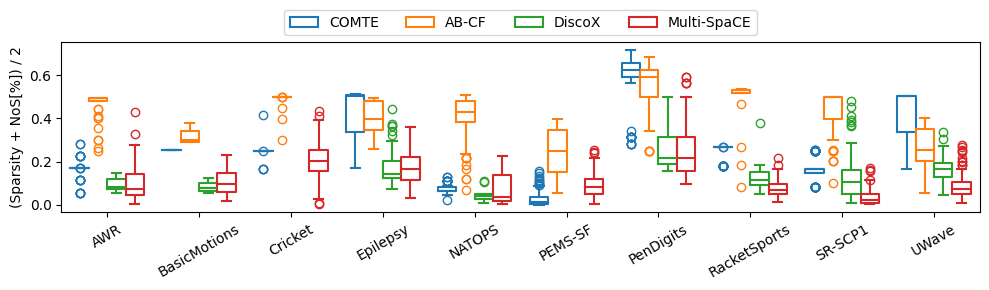

In [93]:
plt.figure(figsize=(10, 3))
ax = sns.boxplot(data=aux_df, x="Dataset", y="(Sparsity + NoS[%]) / 2", hue="Method", fill=False)
# ax.legend(loc='upper right')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=4, title=None)
ax.set(xlabel=None)
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('./experiments/results/multivariate-sparsity-contiguity.PNG', dpi=300)

In [94]:
datasets_trad_dict = {"CBF": "CBF", "chinatown": "Chinatown", "coffee": "Coffee", "gunpoint": "Gunpoint"}
datasets_order = dict(zip(list(datasets_trad_dict.values()), list(range(len(datasets_trad_dict)))))

metrics_trad_dict = {'nchanges': '# changes', 'sparsity': 'Sparsity', 'L1': 'Proximity ($L_1$)', 'L2': 'Proximity ($L_2$)', 'valid': 'Validity',
                     'increase_outlier_score': 'IOS', 'subsequences': 'NoS', 'subsequences %': 'NoS [%]'}

groupby_trad_dict = {'method': 'Method' , 'dataset': 'Dataset'}

metrics = list(metrics_trad_dict.values())
groupby_cols = list(groupby_trad_dict.values())

In [87]:
final_df = results_all_datasets_df.rename(columns={**metrics_trad_dict, **groupby_trad_dict})
final_df = final_df.replace(datasets_trad_dict)
final_df['Validity'] = final_df['Validity'].astype(int)

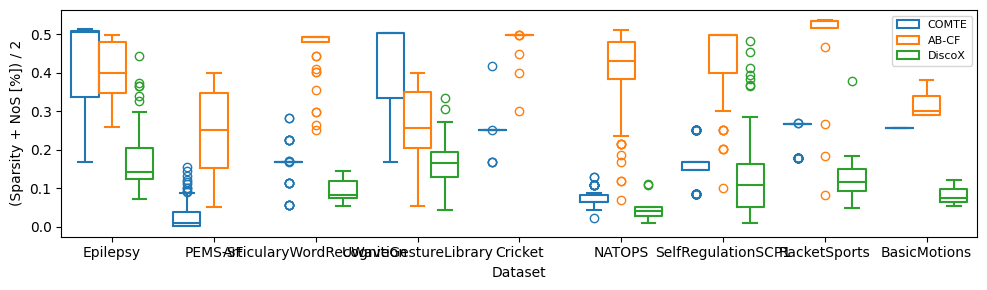

In [88]:
methods = [
    # "multisubspace_gknn_75_0_25_mut01",
    # "multisubspace_gknn_75_0_25_mut02",
    # "multisubspace_gknn_75_0_25_mut03",
    # "multisubspace_gknn_75_0_25_mut04",
    # "multisubspace_gknn_75_0_25_mut05",
    # "multisubspace_gknn_75_0_25_mut06",
    # "multisubspace_gknn_75_0_25_mut07",
    # "multisubspace_gknn_75_0_25_mut08",
    # "multisubspace_gknn_75_0_25_mut09",

    "COMTE",
    "AB-CF",
    "DiscoX",
    "Multi-SpaCE"
]
methods_order = dict(zip(methods, list(range(len(methods)))))

aux_df = final_df.copy()
aux_df = aux_df[aux_df['Method'].isin(methods)]
aux_df['(Sparsity + NoS [%]) / 2'] = (aux_df['Sparsity'] + aux_df['NoS [%]']) / 2
aux_df['Sparsity / NoS [%]'] = aux_df['Sparsity'] / aux_df['NoS [%]'] 
aux_df['Method_ord'] = aux_df['Method'].map( dict(zip(methods, list(range(len(methods))))) )
aux_df = aux_df.reset_index()
aux_df = aux_df.sort_values('Method_ord', ascending=True)


plt.figure(figsize=(10, 3))
ax = sns.boxplot(data=aux_df[aux_df["Dataset"]!="PenDigits"], x="Dataset", y='(Sparsity + NoS [%]) / 2', hue="Method", fill=False)
ax.legend(loc='upper right')
plt.legend(fontsize=8)
plt.tight_layout()

In [19]:
times_df = pd.DataFrame()
for dataset in DATASETS:
    X_train, y_train, X_test, y_test = data_dict[dataset]
    dataset_ts_len, dataset_nchannels = X_train.shape[1], X_train.shape[2]
    dataset_times = results_all_datasets_df[results_all_datasets_df["dataset"] == dataset][['times', 'method', 'dataset']]
    dataset_times["dataset_ts_len"] = dataset_ts_len
    dataset_times["dataset_nchannels"] = dataset_nchannels
    times_df = pd.concat([times_df, dataset_times])
times_df = times_df.rename(columns={"times": "Seconds", "dataset_ts_len": "Time series length", "dataset_nchannels": "Channels"})

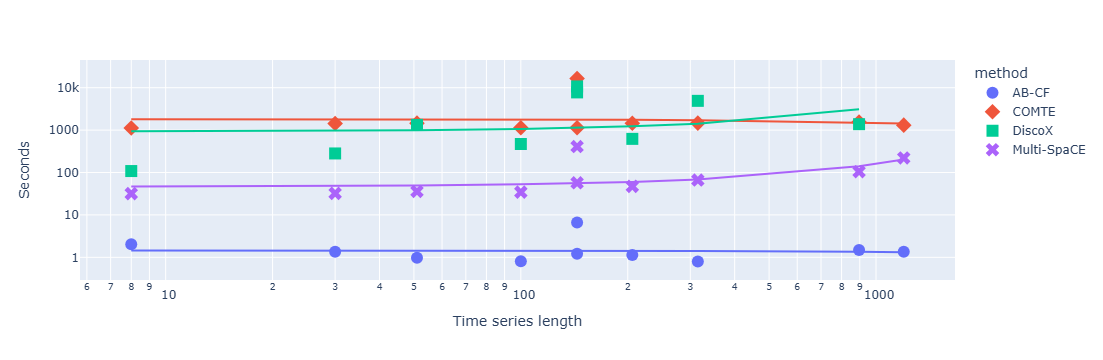

In [21]:
config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'multivariate_times_length',
    'height': 400,
    'width': 1200,
    'scale':9 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

fig = px.scatter(
    times_df.groupby(["dataset", "method"]).mean().reset_index(), 
    x="Time series length", y="Seconds", color="method", symbol="method", trendline="ols", trendline_options=dict(log_y=True), log_x=True, log_y=True)
fig.update_traces(marker={'size': 12})
fig.show(config=config)



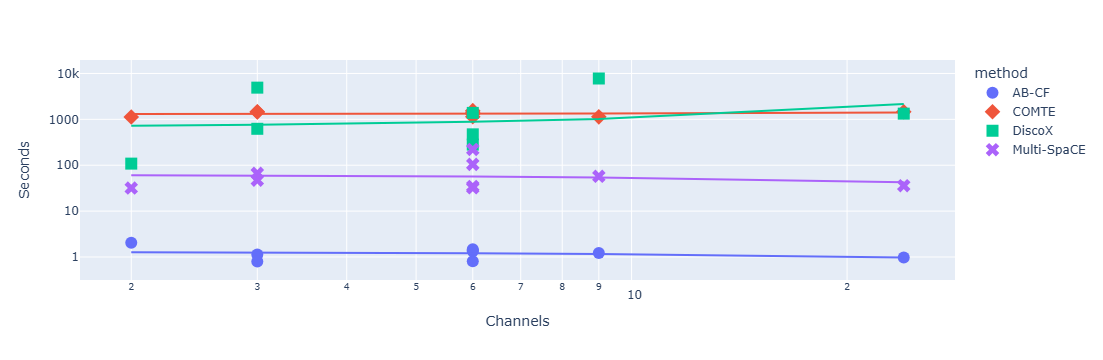

In [22]:
config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'multivariate_times_channels',
    'height': 400,
    'width': 1200,
    'scale':6 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

fig = px.scatter(
    times_df[times_df["dataset"]!="PEMS-SF"].groupby(["dataset", "method"]).mean().reset_index(), 
    x="Channels", y="Seconds", color="method", symbol="method", trendline="ols", trendline_options=dict(log_y=True), log_x=True, log_y=True)
fig.update_traces(marker={'size': 12})
fig.show(config=config)

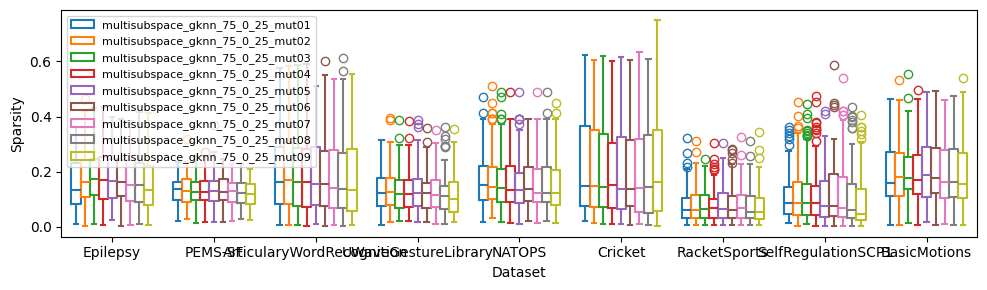

In [47]:
plt.figure(figsize=(10, 3))
ax = sns.boxplot(data=aux_df[aux_df["Dataset"]!="PenDigits"], x="Dataset", y='Sparsity', hue="Method", fill=False)
ax.legend(loc='upper right')
plt.legend(fontsize=8)
plt.tight_layout()

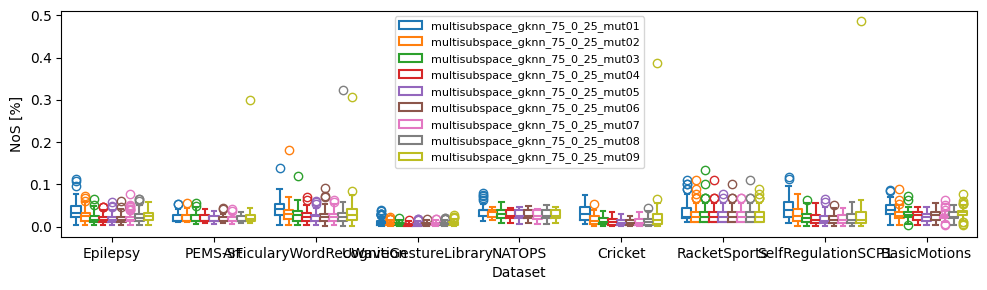

In [48]:
plt.figure(figsize=(10, 3))
ax = sns.boxplot(data=aux_df[aux_df["Dataset"]!="PenDigits"], x="Dataset", y='NoS [%]', hue="Method", fill=False)
ax.legend(loc='upper right')
plt.legend(fontsize=8)
plt.tight_layout()

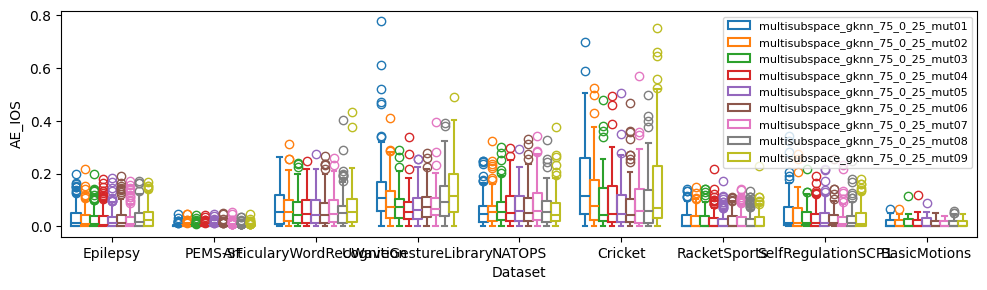

In [49]:
plt.figure(figsize=(10, 3))
ax = sns.boxplot(data=aux_df[aux_df["Dataset"]!="PenDigits"], x="Dataset", y='AE_IOS', hue="Method", fill=False)
ax.legend(loc='upper right')
plt.legend(fontsize=8)
plt.tight_layout()

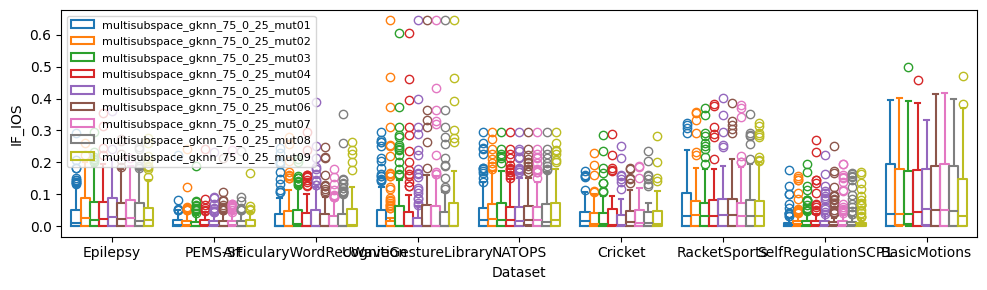

In [50]:
plt.figure(figsize=(10, 3))
ax = sns.boxplot(data=aux_df[aux_df["Dataset"]!="PenDigits"], x="Dataset", y='IF_IOS', hue="Method", fill=False)
ax.legend(loc='upper right')
plt.legend(fontsize=8)
plt.tight_layout()

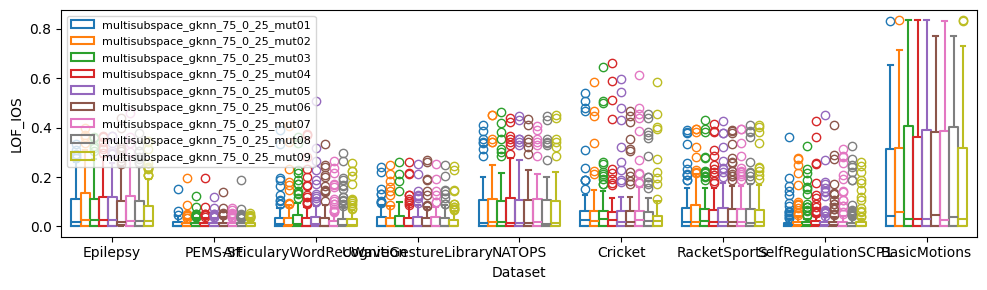

In [51]:
plt.figure(figsize=(10, 3))
ax = sns.boxplot(data=aux_df[aux_df["Dataset"]!="PenDigits"], x="Dataset", y='LOF_IOS', hue="Method", fill=False)
ax.legend(loc='upper right')
plt.legend(fontsize=8)
plt.tight_layout()

# Counterfactual visualization

In [486]:
import math
def plot_comp_cfs(x_orig, possible_nuns, x_cfs_dict, store=False):
    
    # Calculate auxiliary variables
    method_names = list(x_cfs_dict.keys())
    x_cfs = list(x_cfs_dict.values())
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # Define outer grid
    grid_columns = 4
    grid_rows = math.ceil(len(x_cfs) / grid_columns)
    fig = plt.figure(figsize=(18, grid_rows*4), dpi=600)
    outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0.2, hspace=0.3)

    # Iterate through outer grid plots
    for m, outer in enumerate(outer_grid):
        try:
            # Get change mask 
            x_cf = x_cfs[m]
            method_name = method_names[m]
            """# Get nuns used by the method depending on the name
            if "gknn" in method_name:
                nun_example = possible_nuns["gknn"]
            elif "iknn" in method_name:
                nun_example = possible_nuns["iknn"]
            else:
                raise ValueError('Not detected NUN finding procedure in name. Method name must contain "gknn" or "iknn"')"""
            # found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
            proximity_values = np.abs(x_orig - x_cf.reshape(1, length, n_channels))
            found_counterfactual_mask = (proximity_values > np.abs(x_orig)/proximity_values*0.0001).astype(int)
            diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
        except IndexError:
            break
    
        # Create inner grid
        inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0.2, hspace=0.2, subplot_spec=outer)
        sub_channel_axs = []
        for i in range(n_channels):
            ax = plt.Subplot(fig, inner_grid[i])
            # ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
            ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
            ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.axis('off')
            # Set title if first channel
            if i == 0:
                ax.set_title(method_name)
            
            # Add fill to changes
            starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
            ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
            # Iterate over the mask segments and fill them with red color
            for i in range(0, len(starts)):
                start_idx = starts[i]
                end_idx = ends[i]
                # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
                ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
            
            # Add ax to list of subplots
            fig.add_subplot(ax)
            sub_channel_axs.append(ax)

    # Plot figure
    """fig.legend(
        sub_channel_axs,     # The line objects
        labels=['x_cf', 'x_orig'],   # The labels for each line
        loc='center',
        prop={'size': 12}
    )"""
    plt.tight_layout()
    # plt.show()
    if store:
        plt.savefig(f'./experiments/results/examples_cfs_{dataset}_instance_{instance_index}.png', dpi=600)



In [1145]:
dataset = 'ArticularyWordRecognition'
rename_method_dict = {"Multi-SpaCE ($p^p=0.5$)": 'Multi-SpaCE'}

aux_results_dataset = results_all_datasets_df[results_all_datasets_df["dataset"]==dataset].sort_values(by="ii")

with pd.option_context("display.max_rows", None,): 
    display(aux_results_dataset[aux_results_dataset["method"]=="AB-CF"])

ii  nchanges  sparsity           L1         L2     proba  valid  \
0     0       NaN       NaN          NaN        NaN       NaN  False   
1     3       NaN       NaN          NaN        NaN       NaN  False   
2    13       NaN       NaN          NaN        NaN       NaN  False   
3    14       NaN       NaN          NaN        NaN       NaN  False   
4    15       NaN       NaN          NaN        NaN       NaN  False   
5    19       NaN       NaN          NaN        NaN       NaN  False   
6    22       NaN       NaN          NaN        NaN       NaN  False   
7    23       NaN       NaN          NaN        NaN       NaN  False   
8    25       NaN       NaN          NaN        NaN       NaN  False   
9    29       NaN       NaN          NaN        NaN       NaN  False   
10   31       NaN       NaN          NaN        NaN       NaN  False   
11   40       NaN       NaN          NaN        NaN       NaN  False   
12   45       NaN       NaN          NaN        NaN       NaN  False   
13   46       NaN       NaN          NaN        NaN       NaN  False   
14   47       NaN       NaN          NaN        NaN       NaN  False   
15   51    1260.0  0.972222  1363.098317  46.965463  0.992653   True   
16   54    1260.0  0.972222  1420.741828  48.737315  0.992683   True   
17   61     756.0  0.583333   576.463975  25.624975  0.937559   True   
18   63       NaN       NaN          NaN        NaN       NaN  False   
19   64     630.0  0.486111   446.334959  21.408711  0.704640   True   
20   65       NaN       NaN          NaN        NaN       NaN  False   
21   70    1260.0  0.972222   947.721078  34.524707  0.992674   True   
22   72       NaN       NaN          NaN        NaN       NaN  False   
23   76       NaN       NaN          NaN        NaN       NaN  False   
24   77       NaN       NaN          NaN        NaN       NaN  False   
25   79       NaN       NaN          NaN        NaN       NaN  False   
26   82       NaN       NaN          NaN        NaN       NaN  False   
27   84       NaN       NaN          NaN        NaN       NaN  False   
28   86       NaN       NaN          NaN        NaN       NaN  False   
29   94    1260.0  0.972222  1525.921128  53.852915  0.992453   True   
30  100       NaN       NaN          NaN        NaN       NaN  False   
31  102       NaN       NaN          NaN        NaN       NaN  False   
32  104       NaN       NaN          NaN        NaN       NaN  False   
33  105       NaN       NaN          NaN        NaN       NaN  False   
34  108       NaN       NaN          NaN        NaN       NaN  False   
35  109       NaN       NaN          NaN        NaN       NaN  False   
36  111       NaN       NaN          NaN        NaN       NaN  False   
37  113       NaN       NaN          NaN        NaN       NaN  False   
38  114       NaN       NaN          NaN        NaN       NaN  False   
39  115       NaN       NaN          NaN        NaN       NaN  False   
40  124       NaN       NaN          NaN        NaN       NaN  False   
41  125    1260.0  0.972222  1291.883757  44.530803  0.990624   True   
42  126       NaN       NaN          NaN        NaN       NaN  False   
43  127       NaN       NaN          NaN        NaN       NaN  False   
44  128     756.0  0.583333   688.686587  33.109553  0.767436   True   
45  131       NaN       NaN          NaN        NaN       NaN  False   
46  132    1260.0  0.972222  1389.737715  49.542625  0.991238   True   
47  135    1260.0  0.972222  1441.588345  49.423495  0.991818   True   
48  136       NaN       NaN          NaN        NaN       NaN  False   
49  137     881.0  0.679784   482.879948  23.089402  0.984649   True   
50  139     630.0  0.486111   402.837779  21.488830  0.986422   True   
51  142       NaN       NaN          NaN        NaN       NaN  False   
52  146       NaN       NaN          NaN        NaN       NaN  False   
53  152       NaN       NaN          NaN        NaN       NaN  False   
54  153       NaN       NaN          NaN     

In [608]:
desired_methods = ["COMTE", "AB-CF", "DiscoX", "Multi-SpaCE ($p^p=0.5$)"]
common_index_instance = 15

Sample 15: true class 5, x_orig predicted 5, desired_class  8


C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_1220\1751626641.py:31: RuntimeWarning: divide by zero encountered in divide
  found_counterfactual_mask = (proximity_values > np.abs(x_orig)/proximity_values*0.0001).astype(int)
C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_1220\1751626641.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


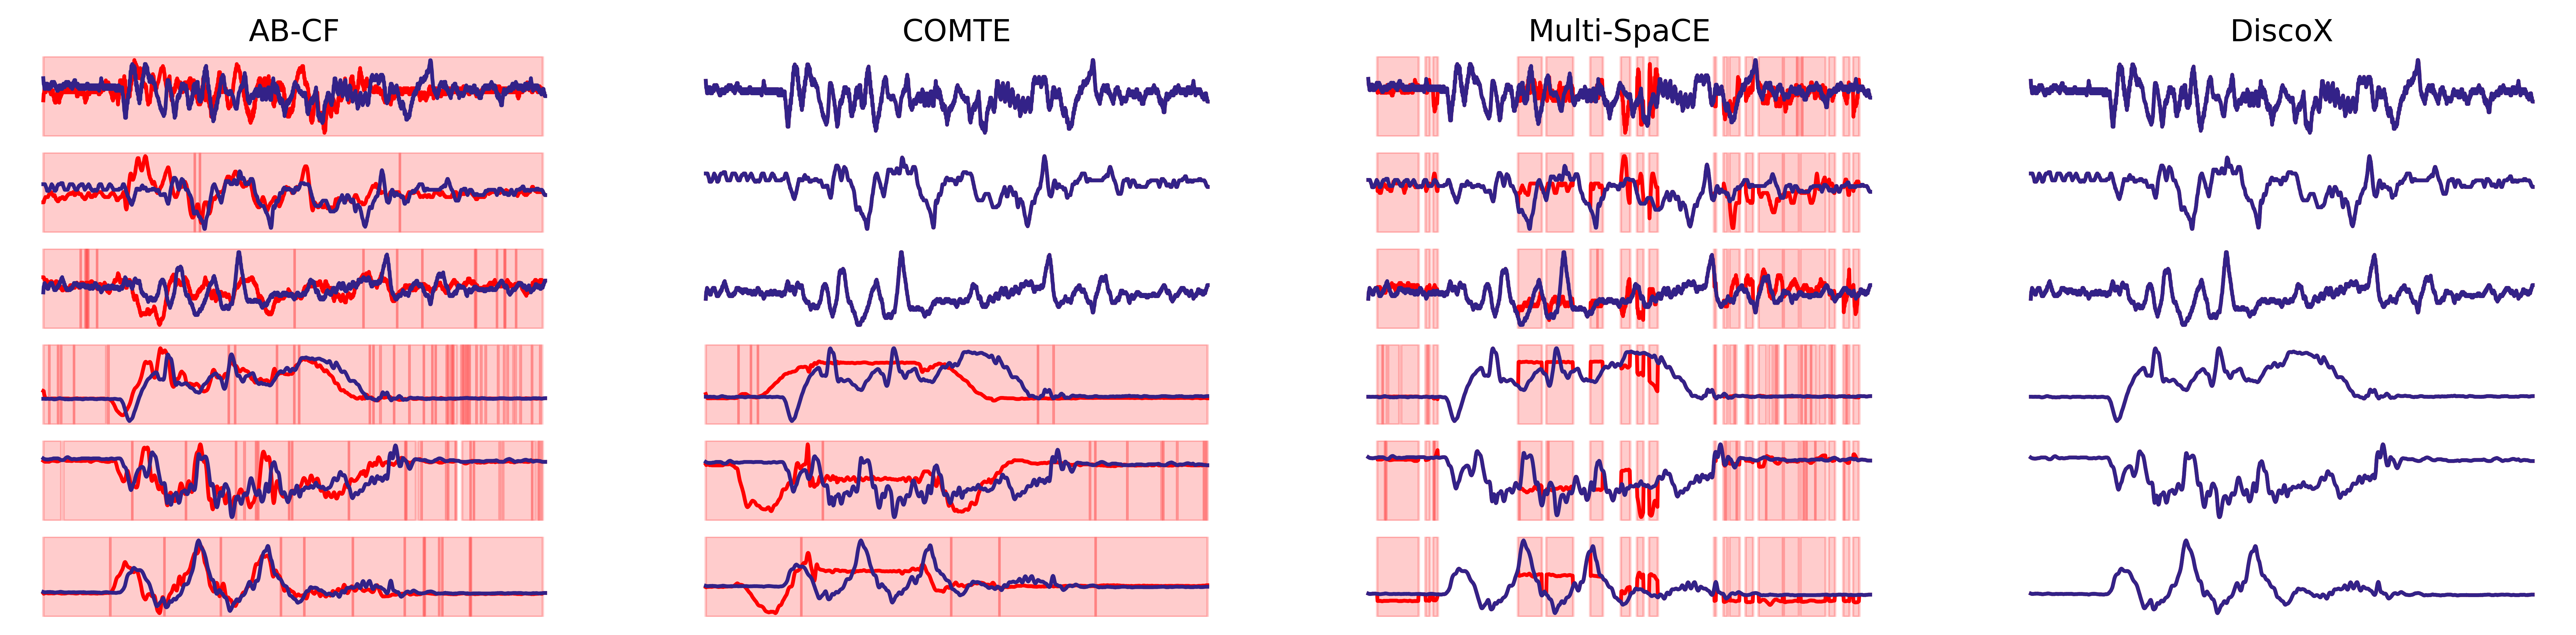

In [609]:
# Get data
X_train, y_train, X_test, y_test = data_dict[dataset]
common_indexes = common_test_indexes_dict[dataset]
instance_index = common_indexes[common_index_instance]

# Get common cfs calculated for all method
x_orig = X_test[instance_index]

# Get possible NUNs
possible_nuns = possible_nuns_dict[dataset]
possible_nuns_instance = {type: possible_nuns[type][instance_index] for type in ["gknn", "iknn"]}

# Get original class and desired class
original_class = original_classes_dict[dataset][instance_index]
desired_class = desired_classes_dict[dataset][instance_index]

# Get the cf calculated for all methods
sol_cfs_methods = {}
sol_methods = methods_cfs_dict[dataset]
if desired_methods is not None:
    sol_methods = {method: solutions for method, solutions in sol_methods.items() if method in desired_methods}

# Add manually DiscoX
if "DiscoX" not in sol_methods:
    DiscoX_sols = []
    for common_index in common_indexes:
        sol_dict = {}
        sol_dict["time"] = -1
        sol_dict["cf"] = np.expand_dims(X_test[common_index], axis=0)
        DiscoX_sols.append(sol_dict)
    sol_methods["DiscoX"] = DiscoX_sols


    
for method, solutions in sol_methods.items():
    if 'cfs' in solutions[0]:
        counterfactuals = [solution['cfs'] for solution in solutions]
    else:
        counterfactuals = [solution['cf'] for solution in solutions] 
    # Extract best counterfactual in case of multi objective
    counterfactual = counterfactuals[common_index_instance]
    # Extract best index solution
    aux_results_dataset_method = aux_results_dataset[aux_results_dataset["method"] == method]

    if len(aux_results_dataset_method) > 0:
        best_cf_index = aux_results_dataset_method.iloc[common_index_instance]["best cf index"]
        best_cf = counterfactual[best_cf_index]
        best_cf = np.expand_dims(best_cf, axis=0)
    else:
        best_cf_index = 0
        best_cf = counterfactual[best_cf_index]
        best_cf = np.expand_dims(best_cf, axis=0)
        
    # Append to dictionary
    new_method_name = method
    if method in rename_method_dict:
        new_method_name = rename_method_dict[method]
    sol_cfs_methods[new_method_name] = best_cf
    
# Show result
print(f'Sample {instance_index}: true class {y_test[instance_index]}, x_orig predicted {original_class}, desired_class  {desired_class}')
plot_comp_cfs(x_orig, possible_nuns_instance, sol_cfs_methods, store=False)

In [137]:
# Create plot with examples of each method in each dataset

In [ ]:
# CBF: 1, 2, 10, 18, 19
# chinatown: 3, 7, 19
# coffee: 1, 3, 9, 16
# ECG200: 0, 13
# gunpoint: 9, 10, 15 (pesimos en general)
dataset_samples = [('CBF', 2), ('chinatown', 19), ('coffee', 3), ('ECG200', 13), ('gunpoint', 15)]
methods_trad_dict = {"wcf_ng": "W-CF", "ng": "NG", "ab_cf": "AB-CF", "subspace": "Sub-SpaCE"}
methods = list(methods_trad_dict.keys())
include_nun_list = [False, False, False, False]

In [ ]:
from collections import OrderedDict

# Define outer grid
fig = plt.figure(figsize=(16, 6))
grid_rows = len(methods)
grid_columns = len(dataset_samples)
outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0, hspace=0)

# Iterate through outer grid plots
for i_outer, outer in enumerate(outer_grid):
    i_dataset = i_outer % grid_columns
    dataset, instance = dataset_samples[i_dataset]
    column_title = f'{dataset} instance {instance}'
    
    X_train, y_train, X_test, y_test = data_dict[dataset]
    nuns_idx = nuns_idx_dict[dataset]
    sol_cfs_methods = sol_cfs_dict[dataset]
    sol_cfs_methods = {method: sol_cfs_methods[method][instance]['cf'] for method in methods}

    # Calculate auxiliary variables
    method_names = list(sol_cfs_methods.keys())
    x_cfs = list(sol_cfs_methods.values())
    x_orig = X_test[instance]
    nun_example = X_train[nuns_idx[instance]]
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # get method m
    m = i_outer // grid_columns
    try:
        # Get change mask 
        x_cf = x_cfs[m]
        method_name = method_names[m]
        found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
        diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
    except IndexError:
        break

    # Create inner grid
    inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0, hspace=0, subplot_spec=outer)
    sub_channel_axs = []
    for i in range(n_channels):
        ax = plt.Subplot(fig, inner_grid[i])
        if include_nun_list[m]:
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
        ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
        ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
        # ax.axis("off")
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add fill to changes
        starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
        ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
        # Iterate over the mask segments and fill them with red color
        for i in range(0, len(starts)):
            start_idx = starts[i]
            end_idx = ends[i]
            # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
            ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
        
        # Set column titles
        if m == 0:
            ax.set_title(column_title)
        if i_dataset == 0:
            ax.set_ylabel(methods_trad_dict[method_name], size='large')
        # Add ax to list of subplots
        fig.add_subplot(ax)
        sub_channel_axs.append(ax)

# Plot figure
plt.tight_layout()
"""fig.legend(
    sub_channel_axs,     # The line objects
    labels=['$x^n$', 'x', "x'"],   # The labels for each line
    loc='lower center',
    # loc='center right',
    prop={'size': 14},
    ncol=3
)"""
# plt.show()
# plt.savefig('./experiments/results/examples_cfs.png', dpi=300)


In [ ]:
from collections import OrderedDict

# Define outer grid
fig = plt.figure(figsize=(12, 12))
grid_rows = len(dataset_samples)
grid_columns = len(methods)
outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0, hspace=0)

# Iterate through outer grid plots
for i_outer, outer in enumerate(outer_grid):
    i_dataset = i_outer // grid_columns
    dataset, instance = dataset_samples[i_dataset]
    
    X_train, y_train, X_test, y_test = data_dict[dataset]
    nuns_idx = nuns_idx_dict[dataset]
    sol_cfs_methods = sol_cfs_dict[dataset]
    sol_cfs_methods = {method: sol_cfs_methods[method][instance]['cf'] for method in methods}

    # Calculate auxiliary variables
    method_names = list(sol_cfs_methods.keys())
    x_cfs = list(sol_cfs_methods.values())
    x_orig = X_test[instance]
    nun_example = X_train[nuns_idx[instance]]
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # get method m
    m = i_outer % grid_columns
    try:
        # Get change mask 
        x_cf = x_cfs[m]
        method_name = method_names[m]
        found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
        diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
    except IndexError:
        break
    
    # Create inner grid
    inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0, hspace=0, subplot_spec=outer)
    sub_channel_axs = []
    for i in range(n_channels):
        ax = plt.Subplot(fig, inner_grid[i])
        if include_nun_list[m]:
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
        ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
        ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
        # ax.axis("off")
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add fill to changes
        starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
        ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
        # Iterate over the mask segments and fill them with red color
        for i in range(0, len(starts)):
            start_idx = starts[i]
            end_idx = ends[i]
            # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
            ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
        
        # Set column titles
        column_title = methods_trad_dict[method_name]
        # row_title = f'{dataset} \n instance {instance}'
        row_title = f'{dataset} [{instance}]'
        if m == 0:
            ax.set_ylabel(row_title, fontsize=16, rotation=90)
        if i_dataset == 0:
            ax.set_title(column_title, fontsize=18)
            
        # Add ax to list of subplots
        fig.add_subplot(ax)
        sub_channel_axs.append(ax)

# Plot figure
plt.tight_layout()
"""fig.legend(
    sub_channel_axs,     # The line objects
    labels=['$x^n$', 'x', "x'"],   # The labels for each line
    # loc='lower center',
    loc='center right',
    prop={'size': 18},
    ncol=1
)"""
# plt.show()
plt.savefig('./experiments/results/examples_cfs.png', dpi=300)


# Explore Pareto-Front

In [610]:
import json
from methods.MultiSubSpaCE.FitnessFunctions import fitness_function_mo

In [1067]:
dataset = "ArticularyWordRecognition"
method_dir_name = "d98ff072a62c4346b035510c421f3498e40f8bbc"

In [1068]:
# Load all info needed to get the counterfactual
data_tuple, original_classes, model, outlier_calculators, possible_nuns, desired_classes = load_dataset_for_eval(dataset, model_to_explain, osc_names)
X_train, y_train, X_test, y_test = data_tuple

# Load solution cfs
with open(f'./experiments/results/{dataset}/{model_to_explain}/{method_dir_name}/counterfactuals.pickle', 'rb') as f:
    solutions = pickle.load(f)
    counterfactuals = [solution['cfs'] for solution in solutions]

# Load params
with open(f'./experiments/results/{dataset}/{model_to_explain}/{method_dir_name}/params.json', 'r') as json_file:
    params = json.load(json_file)
    test_indexes = params["X_test_indexes"]

# Get nuns used by the method depending on the name
if "independent_channels_nun" in params:
    if params["independent_channels_nun"]:
        nuns = possible_nuns["iknn"]
    else:
        nuns = possible_nuns["gknn"]
else:
    nuns = np.array([None]*len(X_test))

# Adapt for subsample
X_test = X_test[test_indexes]
nuns = nuns[test_indexes]
desired_classes = desired_classes[test_indexes]


In [1116]:
instance = 35
# instance = 1

In [1129]:
# Get x, x' and y'
counterfactuals_i = counterfactuals[instance]
x_orig_i = X_test[instance]
nun_i = nuns[instance]
desired_class = desired_classes[instance]

# Calculate objective values
predicted_probs = model.predict(counterfactuals_i, verbose=0)
# Get outlier scores from AE to get the best CF
if outlier_calculators is not None:
    aux_outlier_scores = outlier_calculators["AE"].get_outlier_scores(counterfactuals_i)
else:
    aux_outlier_scores = np.zeros((predicted_probs.shape[0], 1))
# Get fitness scores
change_masks = (counterfactuals_i != x_orig_i).astype(int)
objective_fitness = fitness_function_mo(
    change_masks, predicted_probs, desired_class, aux_outlier_scores,
    outlier_calculators["AE"].get_outlier_scores(x_orig_i)[0], 100
)
objective_fitness_df = pd.DataFrame(objective_fitness, columns=["adversarial", "sparsity", "NoS", "IOS"])
objective_fitness_df = objective_fitness_df.reset_index()

In [1130]:
# objective_front = ["sparsity", "adversarial"]
# objective_front = ["sparsity", "NoS"]
objective_front = ["IOS", "sparsity"]

In [1138]:
from methods.MultiSubSpaCE.MOEvolutionaryOptimizers import IntegratedPruningNSubsequenceEvolutionaryOptimizer
fronts = IntegratedPruningNSubsequenceEvolutionaryOptimizer.fast_non_dominated_sorting(objective_fitness_df[objective_front].values)

for front, front_indexes in enumerate(fronts):
    objective_fitness_df.loc[objective_fitness_df["index"].isin(front_indexes), "front"] = int(front)
filt_objective_fitness_df = objective_fitness_df.astype({'front': 'int32'})
filt_objective_fitness_df = filt_objective_fitness_df[filt_objective_fitness_df["front"]<1]
filt_objective_fitness_df = filt_objective_fitness_df.sort_values(by=objective_front[0], ascending=False)

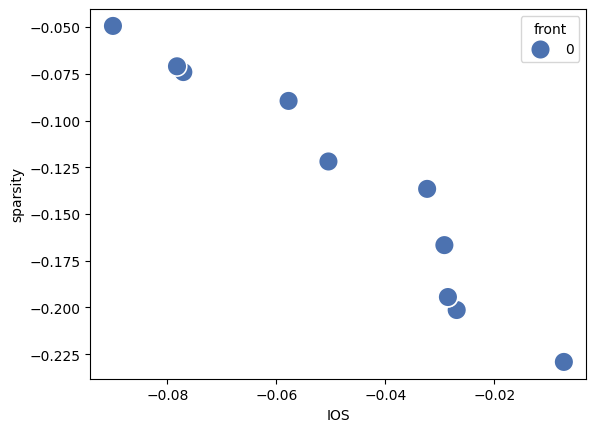

In [1144]:
g = sns.scatterplot(data=filt_objective_fitness_df, x=objective_front[0], y=objective_front[1], hue="front", palette="deep", s=200)
plt.savefig(f'./experiments/results/paretofront_{dataset}_instance_{instance}_{objective_front}.png', dpi=600)

In [1133]:
ilocs = [0, len(filt_objective_fitness_df) // 4, len(filt_objective_fitness_df) // 2, len(filt_objective_fitness_df) // 1.33, -1]
# ilocs = [0, len(filt_objective_fitness_df) // 2, -1]
filt_objective_fitness_df = filt_objective_fitness_df.iloc[ilocs]
filt_objective_fitness_df = filt_objective_fitness_df.drop_duplicates()
index_to_plot = filt_objective_fitness_df["index"].values

In [1134]:
filt_objective_fitness_df

index  adversarial  sparsity       NoS       IOS  front
4       4     0.582002 -0.229167 -0.343295 -0.007269      0
89     89     0.539705 -0.194444 -0.408248 -0.028537      0
19     19     0.429009 -0.136574 -0.333333 -0.032350      0
54     54     0.466604 -0.074074 -0.296380 -0.077074      0
1       1     0.375401 -0.049383 -0.280299 -0.089985      0

In [1135]:
def plot_front_cfs(x_orig, front_cfs, store=False):
    
    # Calculate auxiliary variables
    x_cfs = front_cfs
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # Define outer grid
    grid_columns = len(front_cfs)
    grid_rows = math.ceil(len(x_cfs) / grid_columns)
    fig = plt.figure(figsize=(14, grid_rows*4))
    outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0.2, hspace=0.2)

    # Iterate through outer grid plots
    for m, outer in enumerate(outer_grid):
        try:
            # Get change mask 
            x_cf = x_cfs[m]
            """# Get nuns used by the method depending on the name
            if "gknn" in method_name:
                nun_example = possible_nuns["gknn"]
            elif "iknn" in method_name:
                nun_example = possible_nuns["iknn"]
            else:
                raise ValueError('Not detected NUN finding procedure in name. Method name must contain "gknn" or "iknn"')"""
            # found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
            proximity_values = np.abs(x_orig - x_cf.reshape(1, length, n_channels))
            found_counterfactual_mask = (proximity_values > np.abs(x_orig)/proximity_values*0.0001).astype(int)
            diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
        except IndexError:
            break
    
        # Create inner grid
        inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0.1, hspace=0.1, subplot_spec=outer)
        sub_channel_axs = []
        for i in range(n_channels):
            ax = plt.Subplot(fig, inner_grid[i])
            # ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
            ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
            ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.axis('off')
            # Set title if first channel
            if i == 0:
                ax.set_title(m)
            
            # Add fill to changes
            starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
            ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
            # Iterate over the mask segments and fill them with red color
            for i in range(0, len(starts)):
                start_idx = starts[i]
                end_idx = ends[i]
                # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
                ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
            
            # Add ax to list of subplots
            fig.add_subplot(ax)
            sub_channel_axs.append(ax)

    # Plot figure
    """fig.legend(
        sub_channel_axs,     # The line objects
        labels=['x_cf', 'x_orig'],   # The labels for each line
        loc='upper right',
        prop={'size': 12}
    )"""
    plt.tight_layout()
    # plt.show()
    if store:
        plt.savefig(f'./experiments/results/paretofront_cfs_{dataset}_instance_{instance}_{objective_front}.png', dpi=600)



C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_1220\232148653.py:28: RuntimeWarning: divide by zero encountered in divide
  found_counterfactual_mask = (proximity_values > np.abs(x_orig)/proximity_values*0.0001).astype(int)
C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_1220\232148653.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


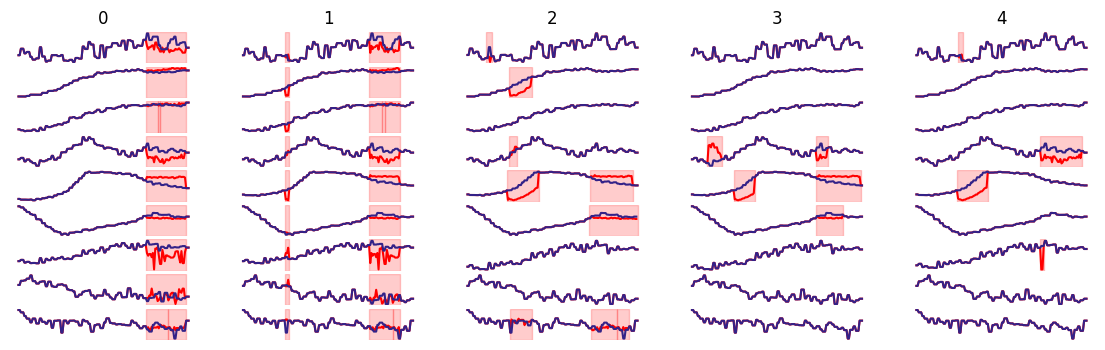

In [1137]:
front_cfs = counterfactuals_i[index_to_plot]
plot_front_cfs(x_orig_i, front_cfs, store=True)

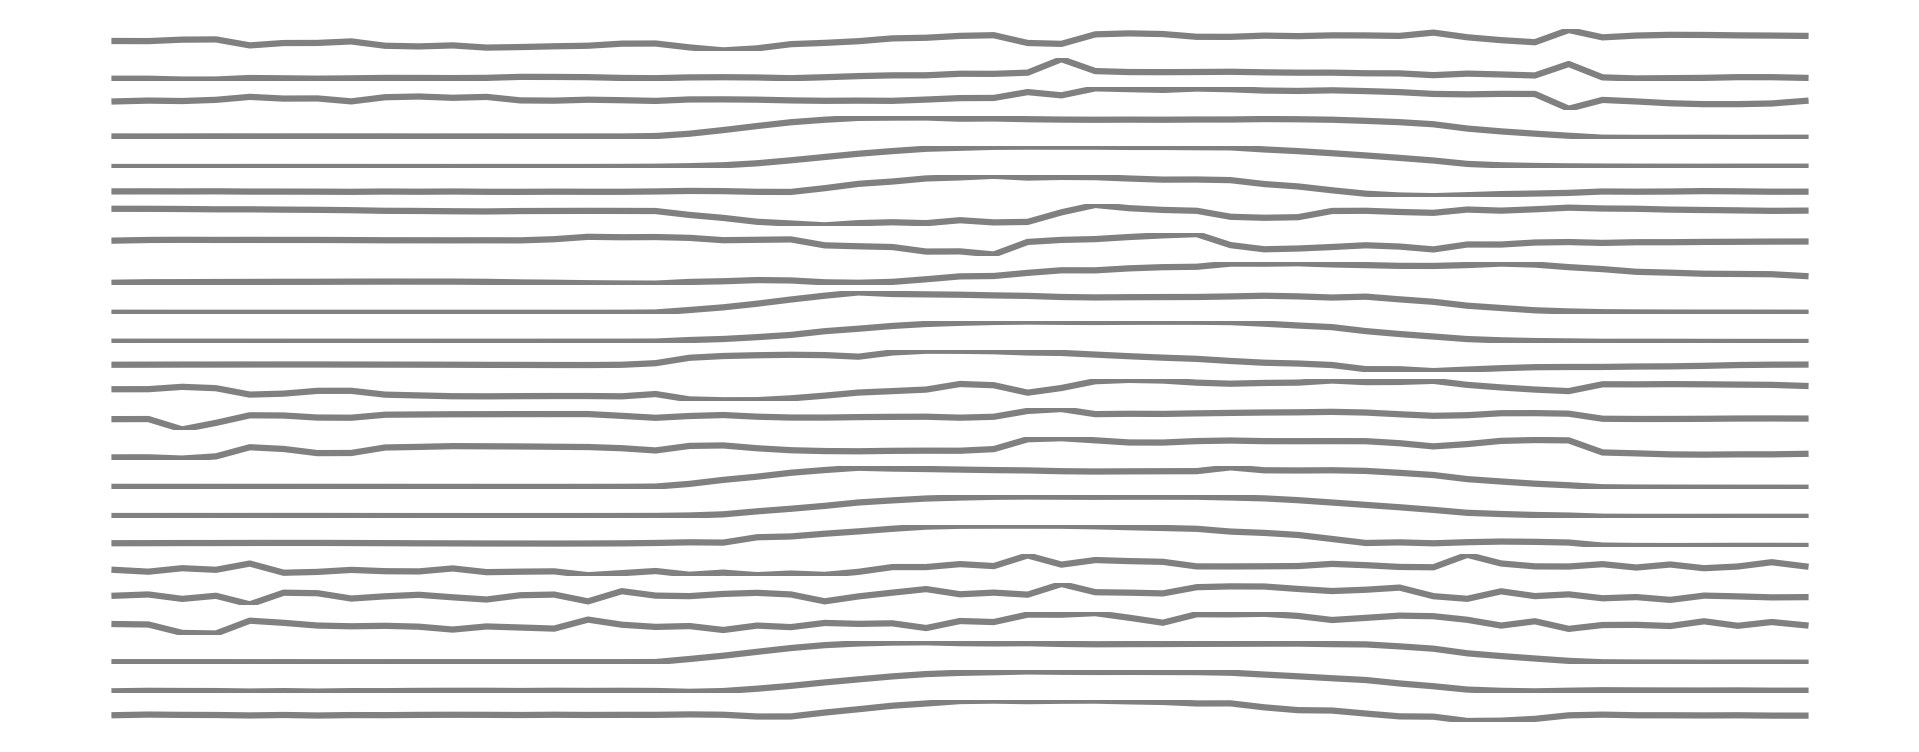

In [920]:
length = x_orig_i.shape[0]
n_channels = x_orig_i.shape[1]

fig = plt.figure(figsize=(8, 3), dpi=300)
grid = gridspec.GridSpec(n_channels, 1, wspace=0.2, hspace=0.3)
for i in range(n_channels):
    ax = plt.Subplot(fig, grid[i])
    # ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
    ax.plot(nun_i.reshape(1, length, n_channels)[:, :, i].flatten(), color="grey")
    ax.set_yticklabels([])
    ax.axis('off')
    fig.add_subplot(ax)
plt.show()

C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_13368\2757957680.py:8: RuntimeWarning: divide by zero encountered in divide
  found_counterfactual_mask = (proximity_values > np.abs(x_orig_i)/proximity_values*0.0001).astype(int)


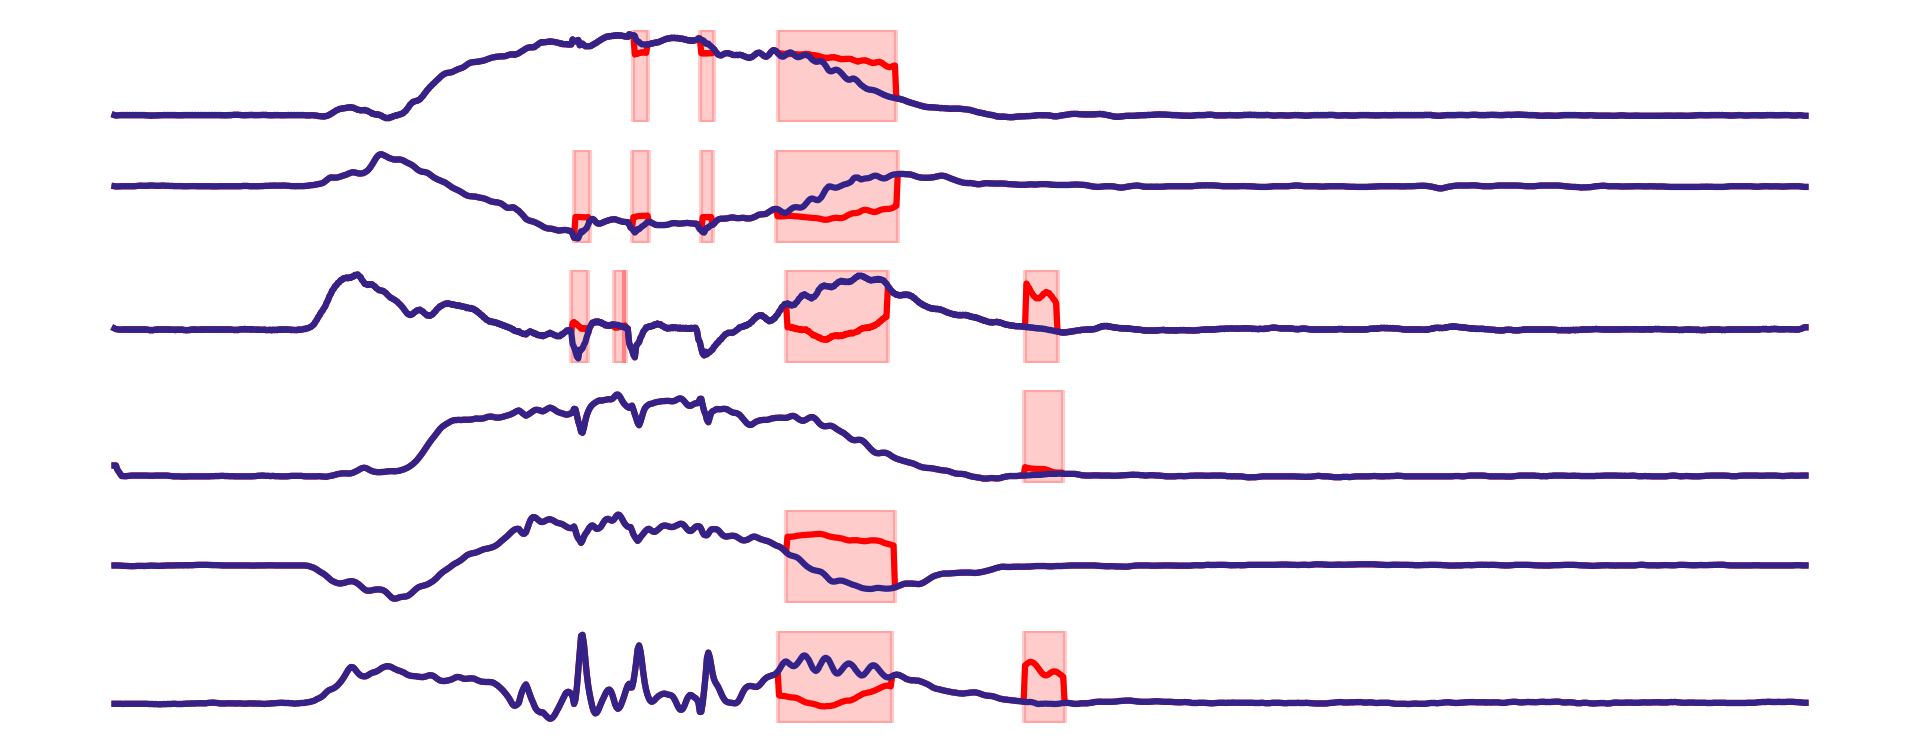

In [814]:
length = x_orig_i.shape[0]
n_channels = x_orig_i.shape[1]

x_cf = front_cfs[2]


proximity_values = np.abs(x_orig_i - x_cf.reshape(1, length, n_channels))
found_counterfactual_mask = (proximity_values > np.abs(x_orig_i)/proximity_values*0.0001).astype(int)
diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)



fig = plt.figure(figsize=(8, 3), dpi=300)
grid = gridspec.GridSpec(n_channels, 1, wspace=0.2, hspace=0.3)
for i in range(n_channels):
    ax = plt.Subplot(fig, grid[i])
    # ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
    ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
    ax.plot(x_orig_i.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
    ax.set_yticklabels([])
    
    # Add fill to changes
    starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
    ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
    # Iterate over the mask segments and fill them with red color
    for i in range(0, len(starts)):
        start_idx = starts[i]
        end_idx = ends[i]
        # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
        ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
    
    # Add ax to list of subplots
    ax.axis('off')
    fig.add_subplot(ax)
plt.show()